# Project Title : Predicting sales of a major store chain Rossmann

# Business Problem
Client interest and demand for product changes with time. Which is important for growing business. Sales prediction is estimating the demand for a service or product for a particular time. This project contains real-world business problem of sales predicting with the help of machine learning models.

Our task is to predict sales and find important factors affecting demand to improve sales.





In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading Datasets
store_df = pd.read_csv("store.csv")
Train_df = pd.read_csv("train.csv")

In [ ]:
store_df

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
Train_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          5  31-07-2015   5263        555   1.0    1.0   
1           2          5  31-07-2015   6064        625   1.0    1.0   
2           3          5  31-07-2015   8314        821   1.0    1.0   
3           4          5  31-07-2015  13995       1498   1.0    1.0   
4           5          5  31-07-2015   4822        559   1.0    1.0   
...       ...        ...         ...    ...        ...   ...    ...   
395751    503          1  14-07-2014   9259        560   1.0    1.0   
395752    504          1  14-07-2014   8943       1064   1.0    1.0   
395753    505          1  14-07-2014   7117        666   1.0    1.0   
395754    506          1  14-07-2014  10650        990   1.0    1.0   
395755    507          1  14-07-2014  11047        710   NaN    NaN   

       StateHoliday  SchoolHoliday  
0                 0            1.0  
1                 0            1.0  
2                 0            1.0  
3                 0            1.0  
4                 0            1.0  
...             ...            ...  
395751          0.0            0.0  
395752          0.0            0.0  
395753          0.0            0.0  
395754          0.0            1.0  
395755          NaN            NaN  

[395756 rows x 9 columns]

In [ ]:
Train_df.shape

(395756, 9)

In [ ]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395756 entries, 0 to 395755
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          395756 non-null  int64  
 1   DayOfWeek      395756 non-null  int64  
 2   Date           395756 non-null  object 
 3   Sales          395756 non-null  int64  
 4   Customers      395756 non-null  int64  
 5   Open           395755 non-null  float64
 6   Promo          395755 non-null  float64
 7   StateHoliday   395755 non-null  object 
 8   SchoolHoliday  395755 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 27.2+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
Train_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Store  DayOfWeek      Sales  Customers       Open      Promo  \
count  395756.00  395756.00  395756.00  395756.00  395755.00  395755.00   
mean      558.70       3.99    5958.41     641.70       0.83       0.40   
std       321.97       1.99    3896.52     465.24       0.37       0.49   
min         1.00       1.00       0.00       0.00       0.00       0.00   
25%       281.00       2.00    3911.00     419.00       1.00       0.00   
50%       558.00       4.00    5953.00     619.00       1.00       0.00   
75%       838.00       6.00    8086.00     844.00       1.00       1.00   
max      1115.00       7.00   41551.00    5494.00       1.00       1.00   

      SchoolHoliday  
count     395755.00  
mean           0.20  
std            0.40  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max            1.00

In [ ]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [ ]:
# checking duplicates in Rossmann Stores Data.csv
len(Train_df[Train_df.duplicated()])

0

In [ ]:
# checking duplicates in Rossmann Stores Data.csv
len(store_df[store_df.duplicated()])

0

In [ ]:
# Checking Null values in store_df
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Replacing Null values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# Replacing Null values with 0 in CompetitionOpenSinceMonth
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Null values with 0 in CompetitionOpenSinceYear
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

# Replacing Null values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)

## Replacing Null values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)

## Replacing Null values with 0 in PromoInterval
store_df['PromoInterval'] =store_df['PromoInterval'].fillna(0)

## Now checking Null values
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we have zero null vales in both datasets

# DATA WRANGLING

In [ ]:
# Store column is common in both the datasets
# Merging both datasets on store using pd.merge
df = pd.merge(Train_df, store_df, on = 'Store', how ='left')

In [ ]:
# checking the shape
df.shape

(395756, 18)

In [ ]:
# first 'Date' object column
# Extracting year, month and day from "Date" using pd.to_datetime
# and Droping column 'Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

df.drop('Date',axis=1,inplace=True)

In [ ]:
# four object datatypes
object_columns = {'StateHoliday','StoreType','Assortment','PromoInterval'}

In [ ]:
# Checking unique values in object columns
for i in list(object_columns-{"Store"}):
  print('\033[91m' , i , '\033[0m')
  print(df[i].unique())

 StateHoliday 
['0' 'a' 'b' 'c' 0 nan]
 PromoInterval 
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
 Assortment 
['a' 'c' 'b']
 StoreType 
['c' 'a' 'd' 'b']


In [ ]:
# Changing Assortment, StoreType and PromoInterval Datatypes ti int
df['Assortment'] = df['Assortment'].map({'a':0, 'c':1,'b':2})
df['Assortment'] = df['Assortment'].astype(int, copy=False)

df['StoreType'] = df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
df['StoreType'] = df['StoreType'].astype(int, copy=False)

df['PromoInterval'] = df['PromoInterval'].map({0: 0,'Jan,Apr,Jul,Oct': 1,'Feb,May,Aug,Nov': 2,'Mar,Jun,Sept,Dec': 3})
df['PromoInterval'] = df['PromoInterval'].astype(int, copy=False)


In [ ]:
# Checking Datatypes using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395756 entries, 0 to 395755
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      395756 non-null  int64  
 1   DayOfWeek                  395756 non-null  int64  
 2   Sales                      395756 non-null  int64  
 3   Customers                  395756 non-null  int64  
 4   Open                       395755 non-null  float64
 5   Promo                      395755 non-null  float64
 6   StateHoliday               395755 non-null  object 
 7   SchoolHoliday              395755 non-null  float64
 8   StoreType                  395756 non-null  int64  
 9   Assortment                 395756 non-null  int64  
 10  CompetitionDistance        395756 non-null  float64
 11  CompetitionOpenSinceMonth  395756 non-null  float64
 12  CompetitionOpenSinceYear   395756 non-null  float64
 13  Promo2                     39

In [ ]:
# checking value counts using value_counts() funtion
df['StateHoliday'].value_counts()

StateHoliday
0    316505
0     68075
a      7075
b      2230
c      1870
Name: count, dtype: int64

In [ ]:
# Replacing all 0
df['StateHoliday'] = df['StateHoliday'].replace("0",0)

In [ ]:
df['StateHoliday'].value_counts()

StateHoliday
0    384580
a      7075
b      2230
c      1870
Name: count, dtype: int64

In [ ]:
# Encoding Stateholiday
df = pd.get_dummies(df, columns=["StateHoliday"],drop_first=True)

In [ ]:
# checking top 5 rows
df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  StoreType  \
0      1          5   5263        555   1.0    1.0            1.0          3   
1      2          5   6064        625   1.0    1.0            1.0          1   
2      3          5   8314        821   1.0    1.0            1.0          1   
3      4          5  13995       1498   1.0    1.0            1.0          3   
4      5          5   4822        559   1.0    1.0            1.0          1   

   Assortment  CompetitionDistance  ...  Promo2  Promo2SinceWeek  \
0           0               1270.0  ...       0              0.0   
1           0                570.0  ...       1             13.0   
2           0              14130.0  ...       1             14.0   
3           1                620.0  ...       0              0.0   
4           0              29910.0  ...       0              0.0   

   Promo2SinceYear  PromoInterval  Year  Month  Day  StateHoliday_a  \
0              0.0              0  2015      7   31           False   
1           2010.0              1  2015      7   31           False   
2           2011.0              1  2015      7   31           False   
3              0.0              0  2015      7   31           False   
4              0.0              0  2015      7   31           False   

   StateHoliday_b  StateHoliday_c  
0           False           False  
1           False           False  
2           False           False  
3           False           False  
4           False           False  

[5 rows x 22 columns]

# EDA - Exploratory Data Analysis
With the help of exploratory data analysis we will find the trends and patterns in the data and make our conclusion. We will use matplotlib,Seaborn for visualization and pandas to explore data

# Hypothesis
Promotion will leads to increse in sales. Weekend the sales would be low as stores will be closed. Holidays will leads to decrese in sales. The number of customers will positively correlated with sales. Sales will be zero when stores are closed.

# Features Unique Values

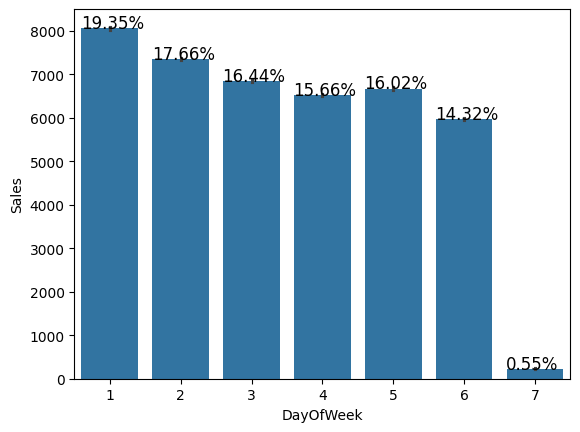

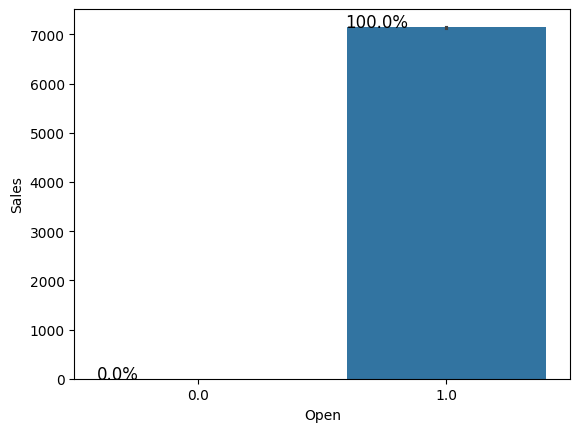

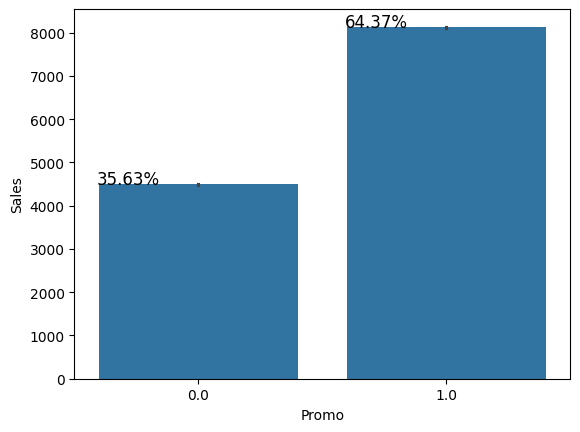

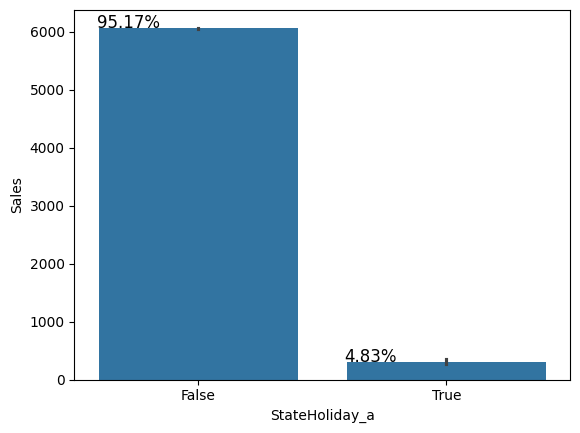

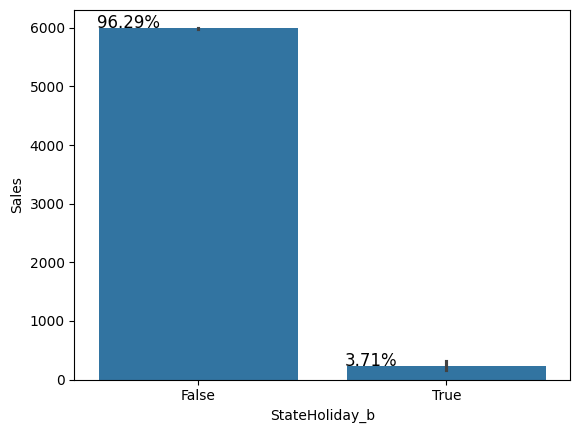

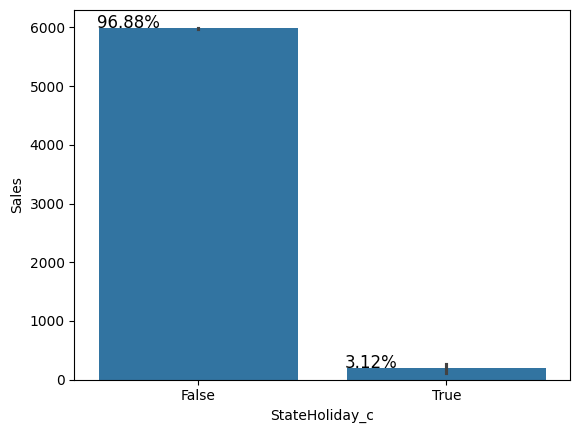

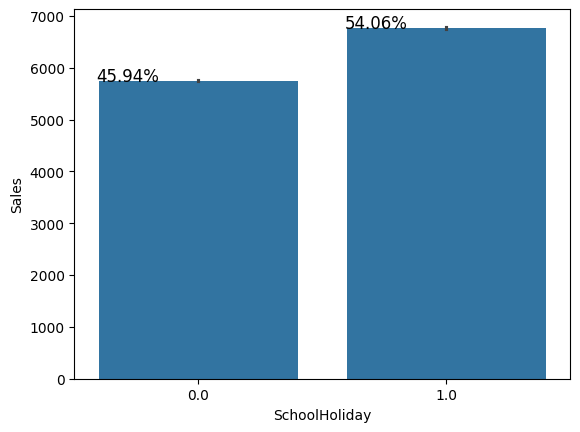

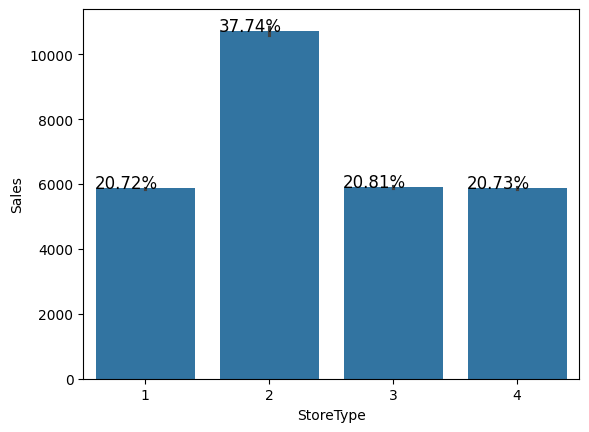

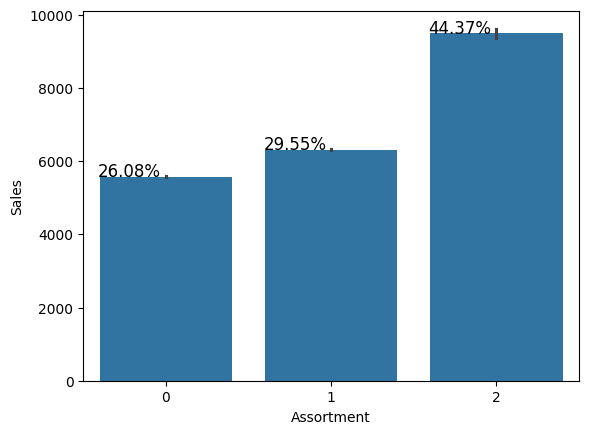

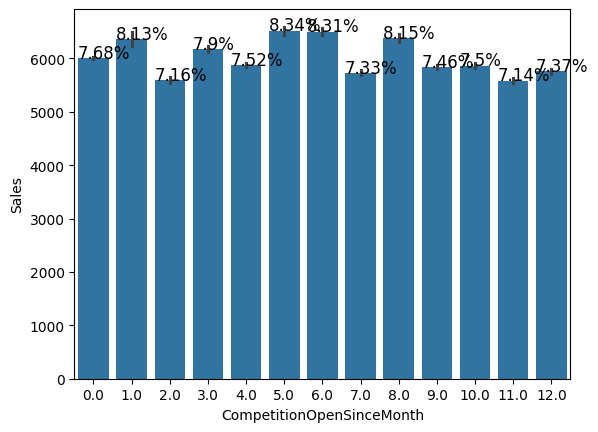

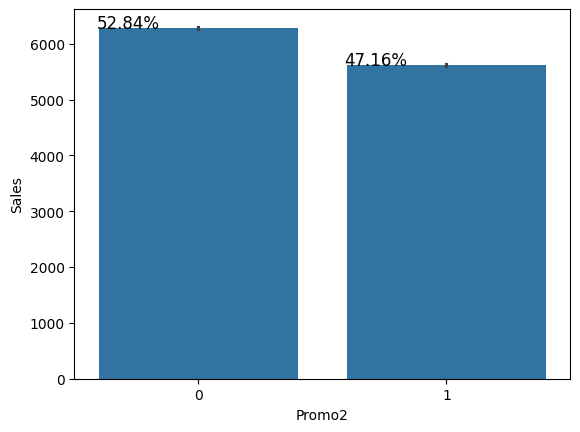

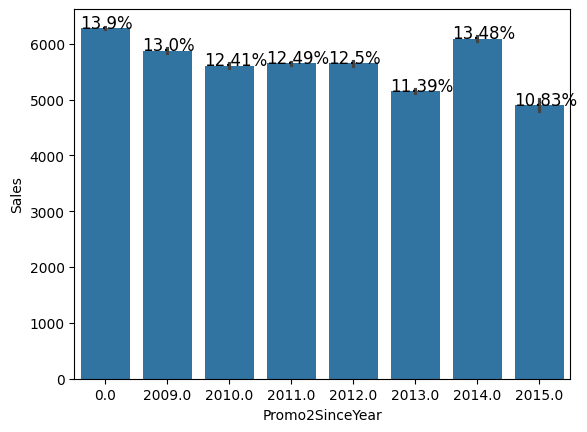

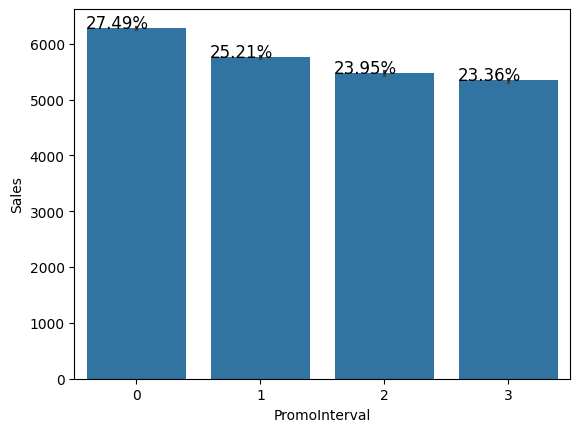

In [ ]:
# Chart - 1 visualization code
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday_a','StateHoliday_b','StateHoliday_c','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

In [ ]:
# '\033[91m' for colour red and'\033[0m' to end colour
# (https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python)

for i in list(set(df.columns)-{"Store","Date","CompetitionDistance","Sales","Customers"}):
  print('\033[91m' , i , '\033[0m')
  print(df[i].unique())

 PromoInterval 
[0 1 2 3]
 StateHoliday_a 
[False  True]
 Promo2SinceYear 
[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
 DayOfWeek 
[5 4 3 2 1 7 6]
 CompetitionOpenSinceMonth 
[ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.]
 StateHoliday_b 
[False  True]
 StateHoliday_c 
[False  True]
 Assortment 
[0 1 2]
 Promo2 
[0 1]
 CompetitionOpenSinceYear 
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
 Promo2SinceWeek 
[ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
 Month 
[ 7  6  5  4  3  2  1 12 11 10  9  8]
 Year 
[2015 2014]
 SchoolHoliday 
[ 1.  0. nan]
 Open 
[ 1.  0. nan]
 Day 
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]
 Promo 
[ 1.  0. nan]
 StoreType 
[3 1 4 2]


# Value Count (Categorical Features)

Promo2
0    203962
1    191794
Name: count, dtype: int64


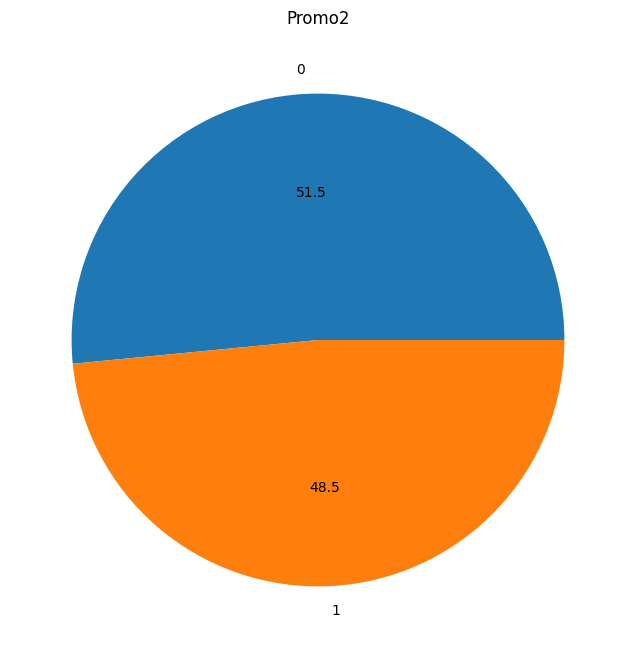

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Assortment
0    207192
1    185293
2      3271
Name: count, dtype: int64


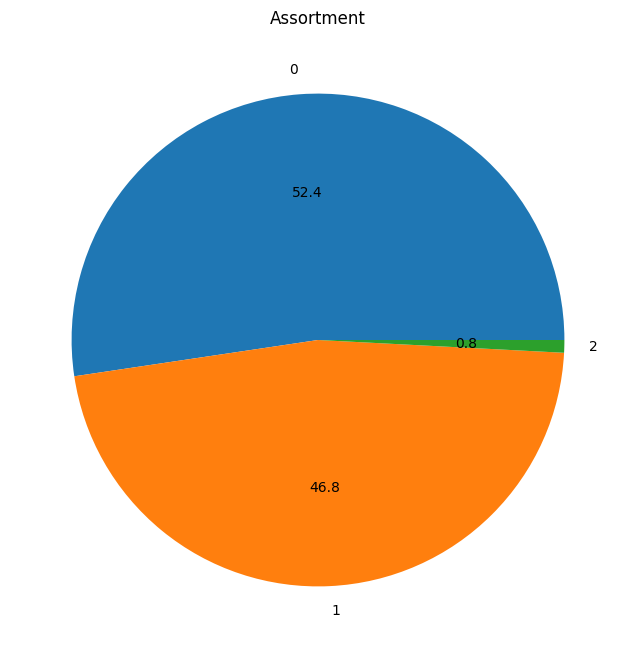

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
SchoolHoliday
0.0    315432
1.0     80323
Name: count, dtype: int64


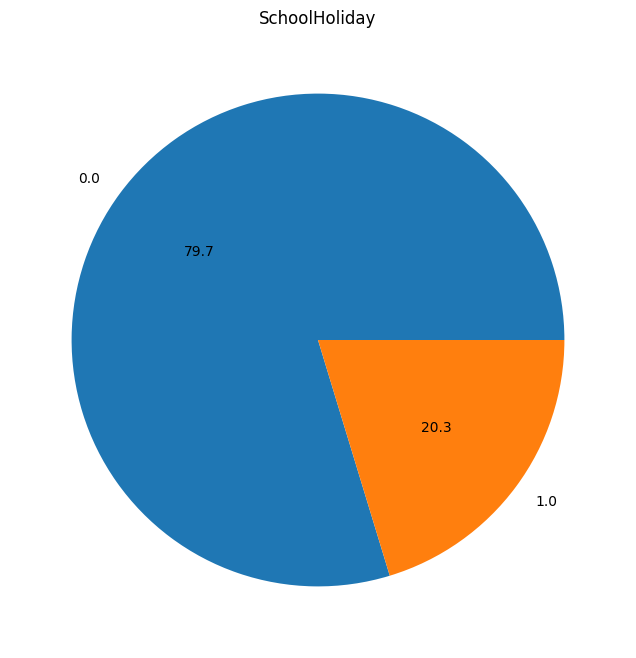

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Year
2015    236380
2014    159376
Name: count, dtype: int64


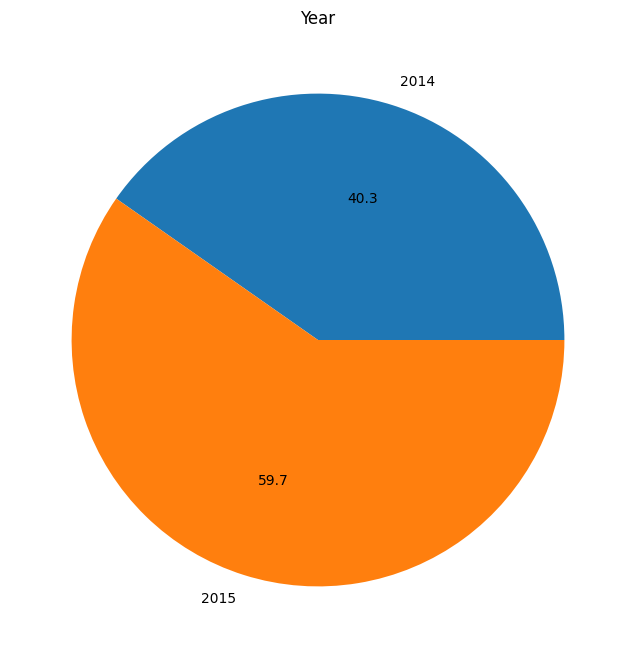

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Open
1.0    329969
0.0     65786
Name: count, dtype: int64


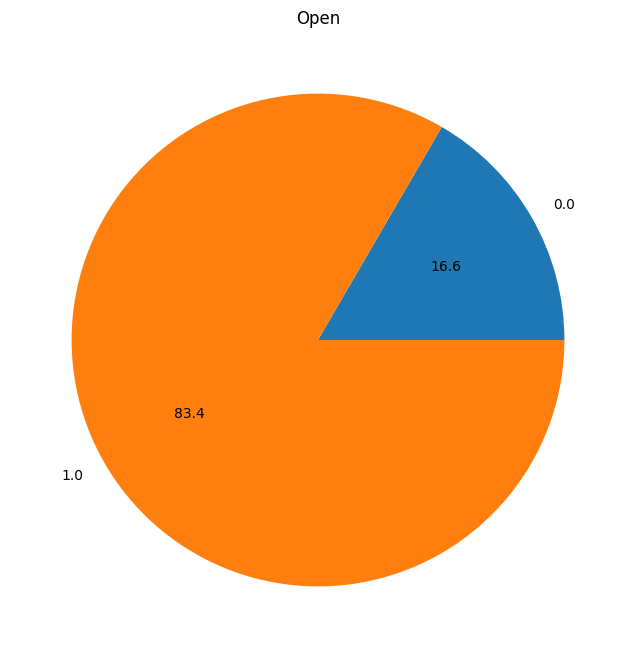

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Promo
0.0    236040
1.0    159715
Name: count, dtype: int64


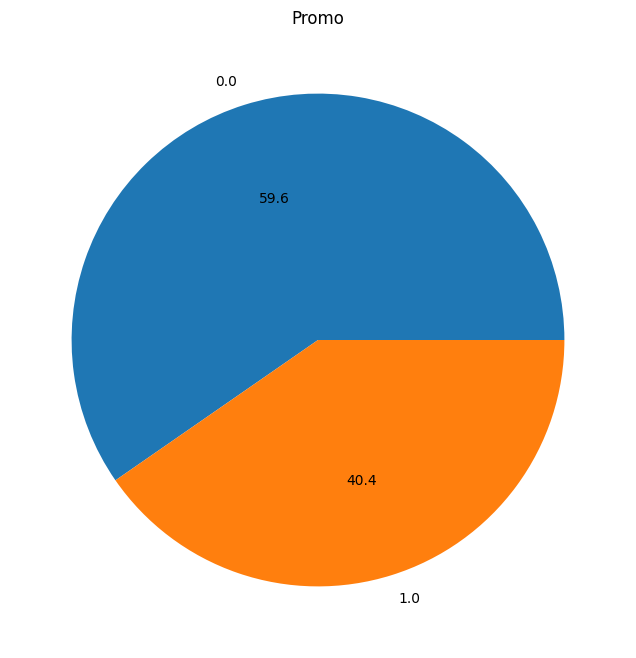

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


In [ ]:
for i in set(df.columns)-{"StateHoliday_b","StateHoliday_a","StateHoliday_c"}:

  #cant visualize large number of categories
  if len(df[i].unique()) > 3:
    continue
  plt.rcParams.update({'figure.figsize':(8,8),'figure.dpi':100})
  df.groupby(i).size().plot(kind='pie',autopct='%.1f')
  print(df[i].value_counts())
  plt.title(i)

  plt.show()
  print("\033[91m = \033[0m" * 30)

### <font color='orange'>Insights</font>
---
* 38.2 % data has `promo`tion involved
* 54.2% data is of `store type` "a"
* 17% data is of closed stores
* Data contain 2013 values arount 40%

# Multivariated Analysis

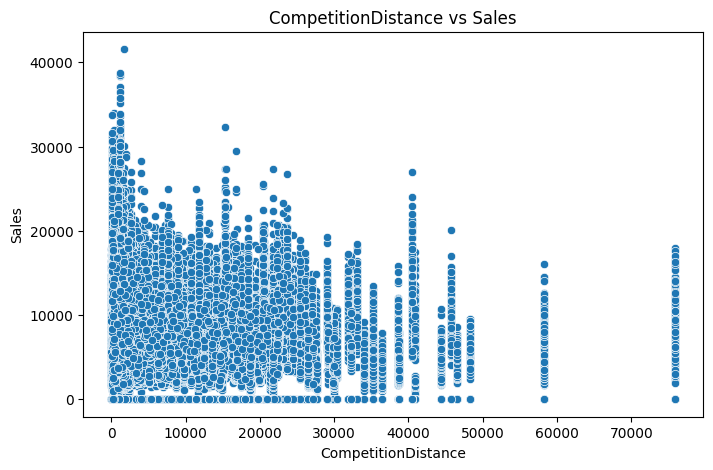

In [ ]:
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
sns.scatterplot(data=df,x="CompetitionDistance",y="Sales")
plt.title("CompetitionDistance vs Sales")
plt.show()

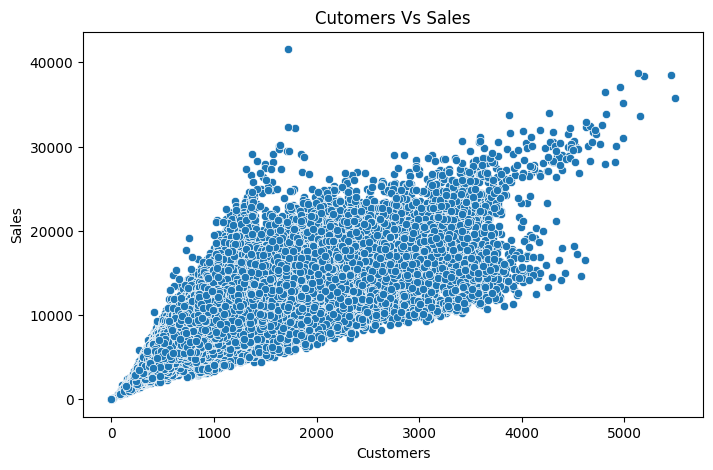

In [ ]:
sns.scatterplot(data=df,x="Customers",y="Sales")
plt.title("Cutomers Vs Sales")
plt.show()

### <font color='orange'>Insights</font>
* The competitor stores are closed to each other has more sales
* We can see that `sales` are positively correlated with `customers `

<Axes: >

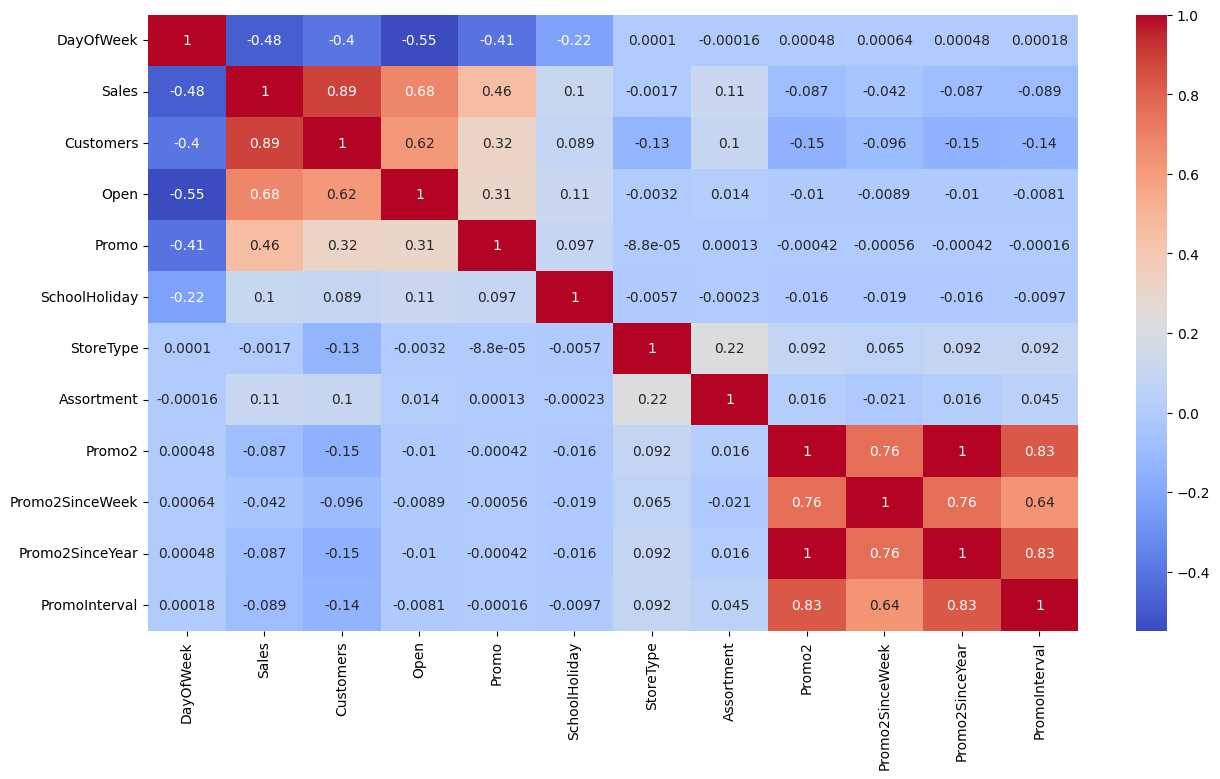

In [ ]:
plt.figure(figsize=(15, 8))
df_corr = df[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']].corr()
sns.heatmap(df_corr,annot=True,cmap='coolwarm')


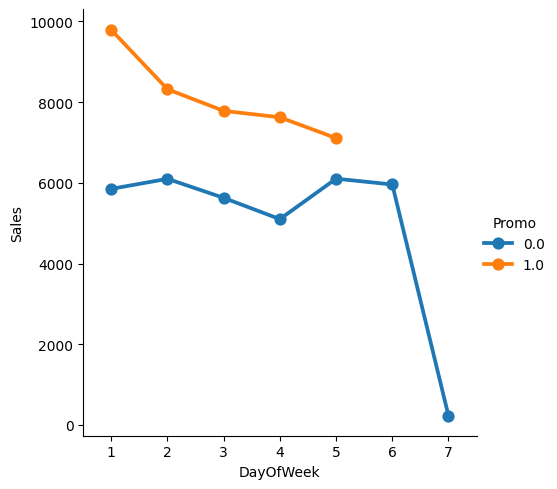

In [ ]:
# As We can see that when the promo is running Sales are high.
sns.catplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo", kind="point")

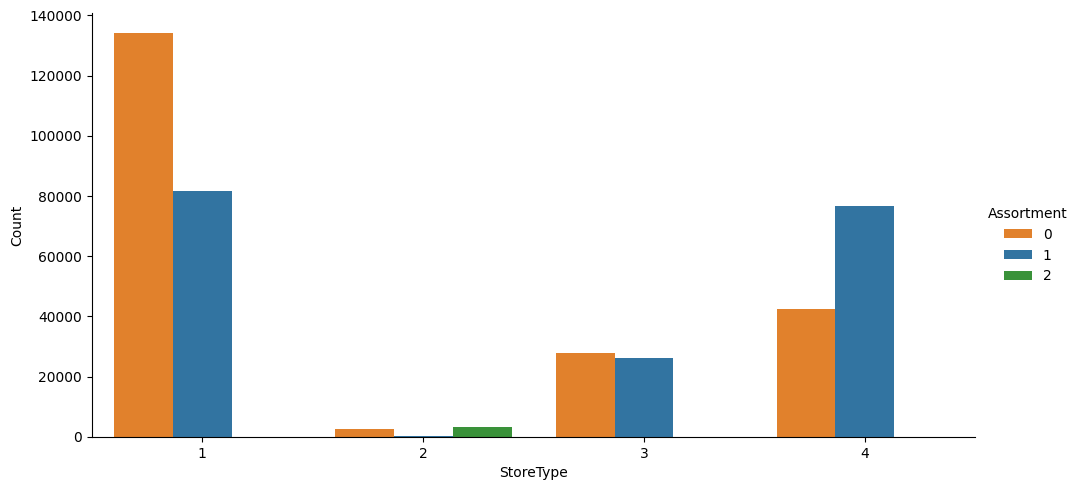

In [ ]:
sns.axes_style('whitegrid')
sns.catplot(x='StoreType',data=df,aspect=2,kind='count',hue='Assortment',
            palette=['C1', 'C0','C2']).set_ylabels('Count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1900.0'),
  Text(2, 0, '1961.0'),
  Text(3, 0, '1990.0'),
  Text(4, 0, '1994.0'),
  Text(5, 0, '1995.0'),
  Text(6, 0, '1998.0'),
  Text(7, 0, '1999.0'),
  Text(8, 0, '2000.0'),
  Text(9, 0, '2001.0'),
  Text(10, 0, '2002.0'),
  Text(11, 0, '2003.0'),
  Text(12, 0, '2004.0'),
  Text(13, 0, '2005.0'),
  Text(14, 0, '2006.0'),
  Text(15, 0, '2007.0'),
  Text(16, 0, '2008.0'),
  Text(17, 0, '2009.0'),
  Text(18, 0, '2010.0'),
  Text(19, 0, '2011.0'),
  Text(20, 0, '2012.0'),
  Text(21, 0, '2013.0'),
  Text(22, 0, '2014.0'),
  Text(23, 0, '2015.0')])

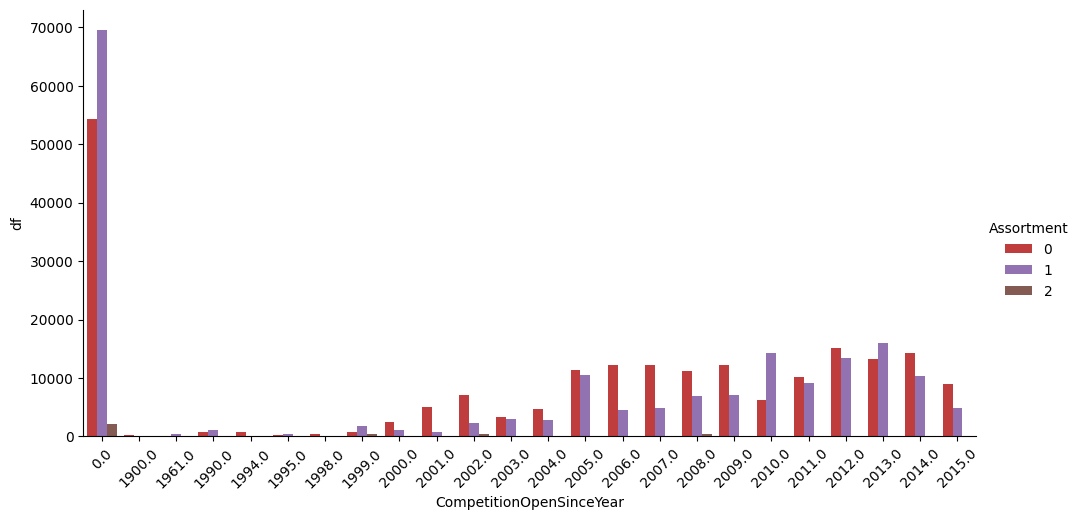

In [ ]:
sns.axes_style('whitegrid')
sns.catplot(x = 'CompetitionOpenSinceYear',data=df,aspect=2,kind='count',hue='Assortment',
            palette=['C3', 'C4','C5']).set_ylabels('df')
plt.xticks(rotation=45)

np.float64(2.937165100622358)

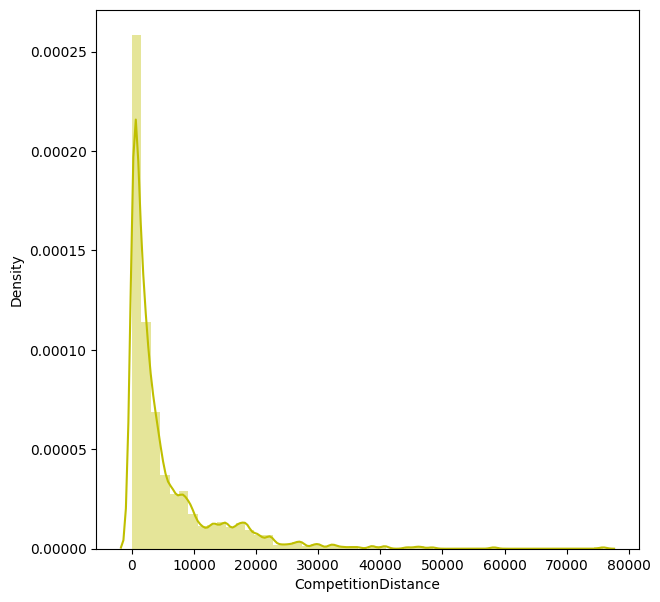

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionDistance'],color='y')

df['CompetitionDistance'].skew()

np.float64(-0.3623777402145439)

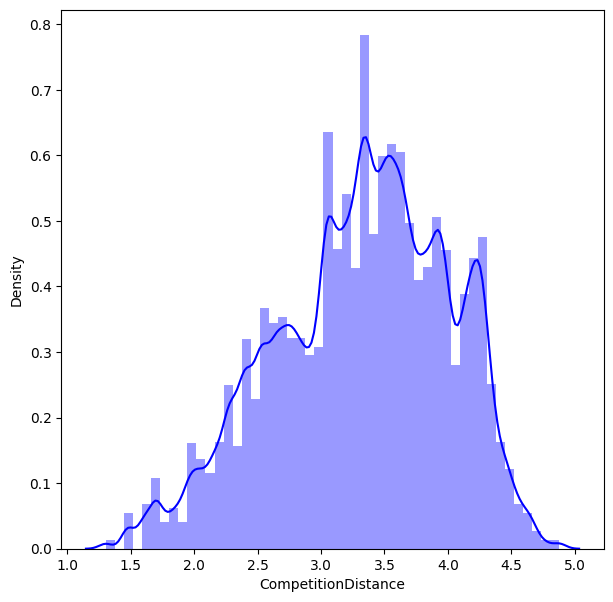

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(np.log10(df['CompetitionDistance']),color='b')

np.log10(df['CompetitionDistance']).skew()

np.float64(0.19156827465744034)

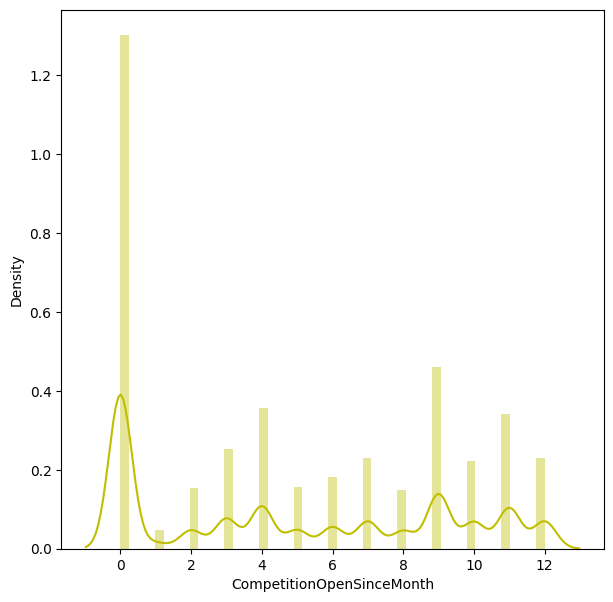

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionOpenSinceMonth'],color='y')

df['CompetitionOpenSinceMonth'].skew()

np.float64(-0.7794845338236169)

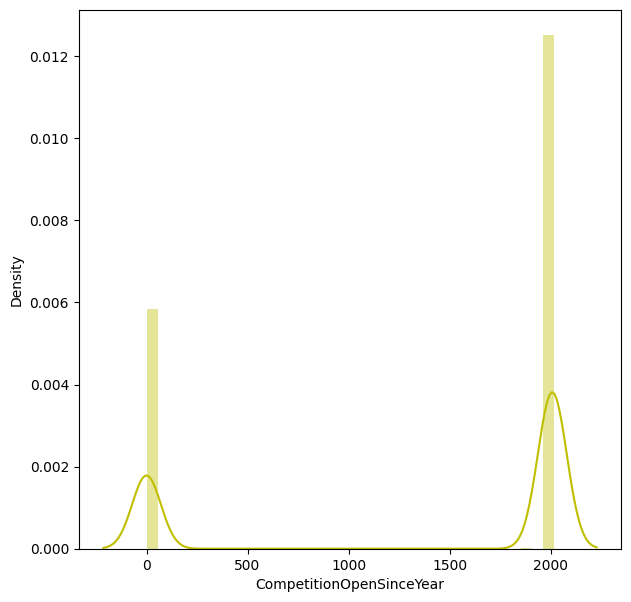

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionOpenSinceYear'],color='y')

df['CompetitionOpenSinceYear'].skew()

np.float64(1.0813119920021745)

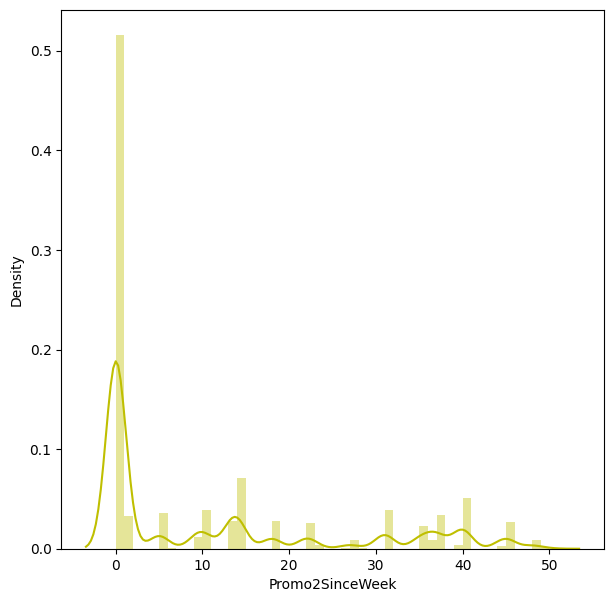

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['Promo2SinceWeek'],color ='y')

df['Promo2SinceWeek'].skew()

np.float64(0.06152565788381319)

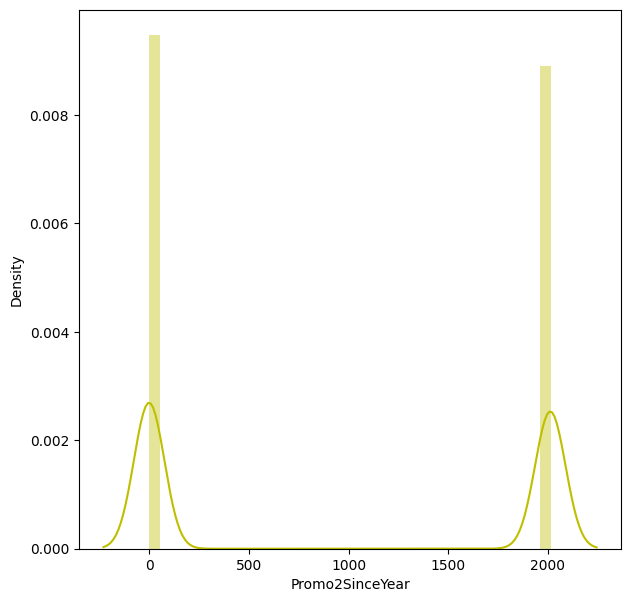

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['Promo2SinceYear'],color ='y')

df['Promo2SinceYear'].skew()

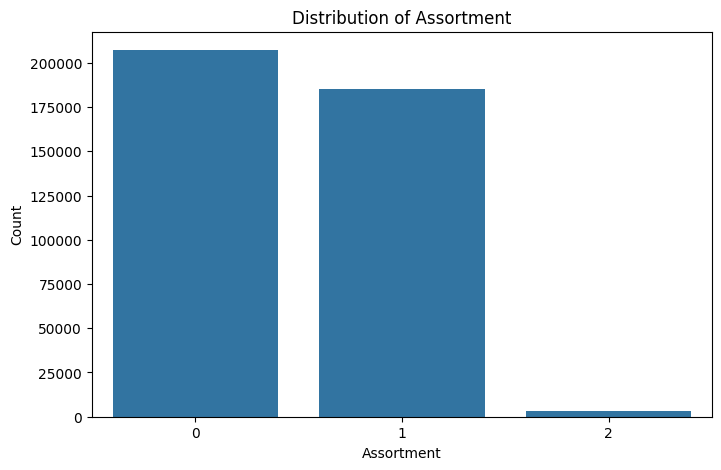

In [ ]:
# Counting the occurrences of each Assortment type
assortment_counts = df['Assortment'].value_counts().reset_index()
assortment_counts.columns = ['Assortment', 'Count']

# Creating a bar plot of Assortment counts
sns.barplot(x='Assortment', y='Count', data=assortment_counts)
plt.title('Distribution of Assortment')
plt.show()

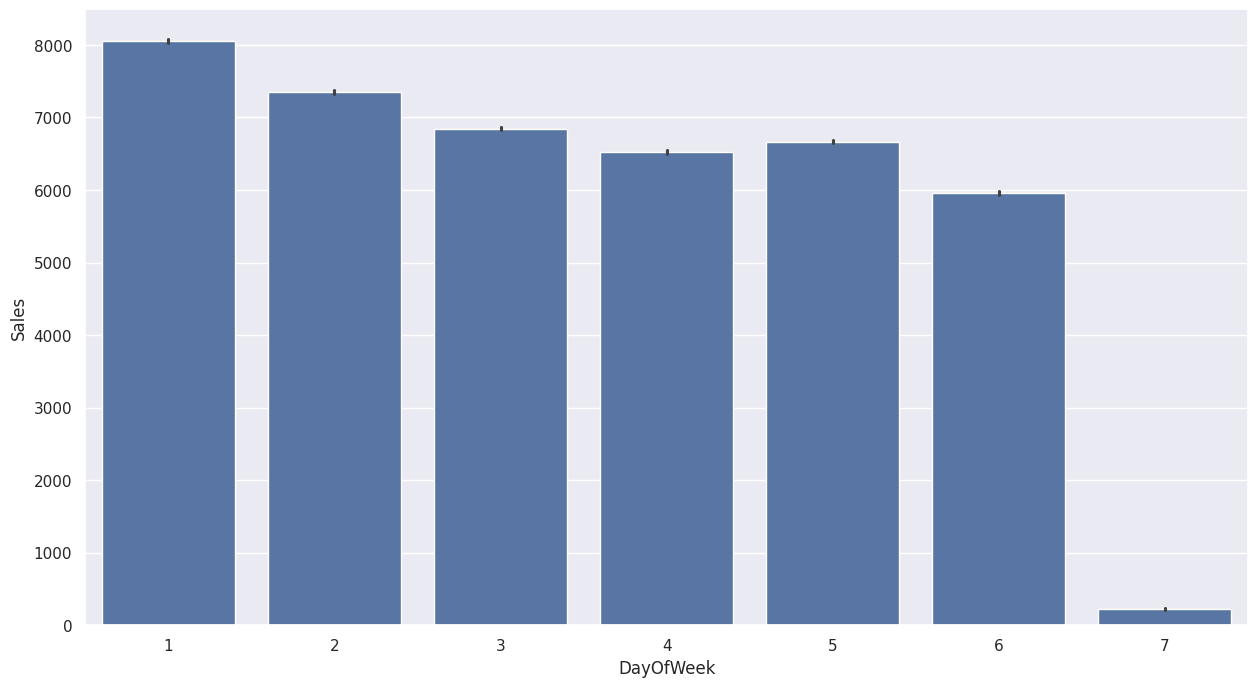

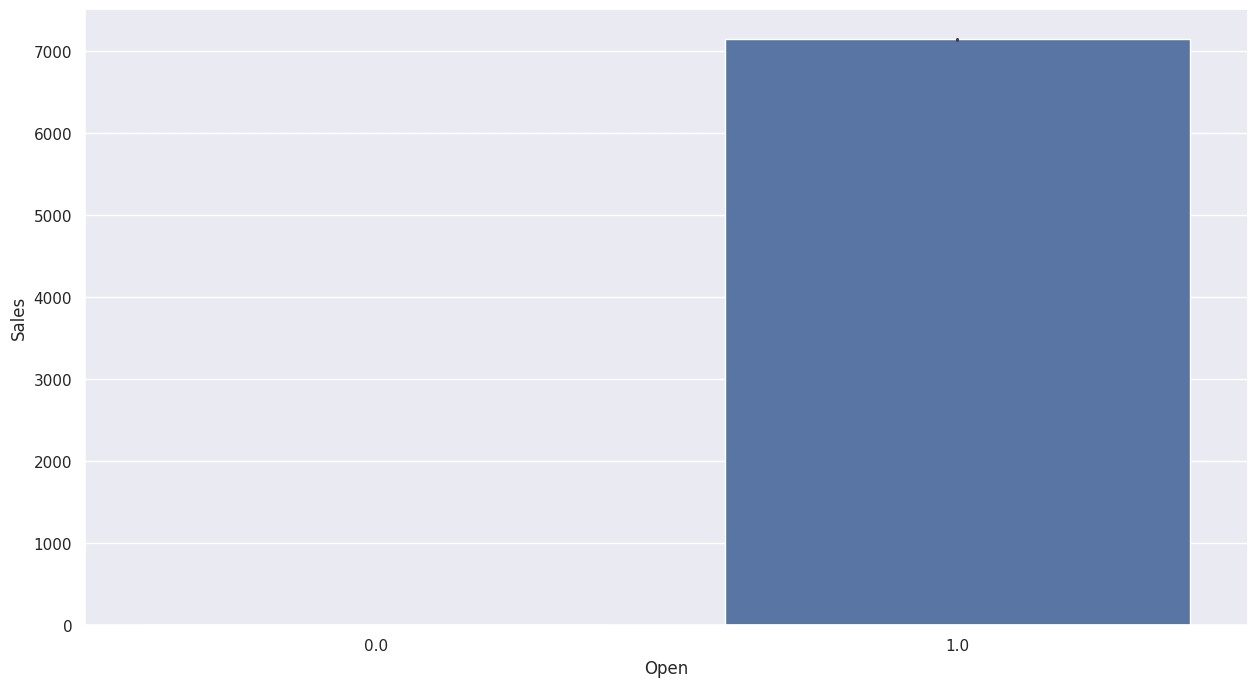

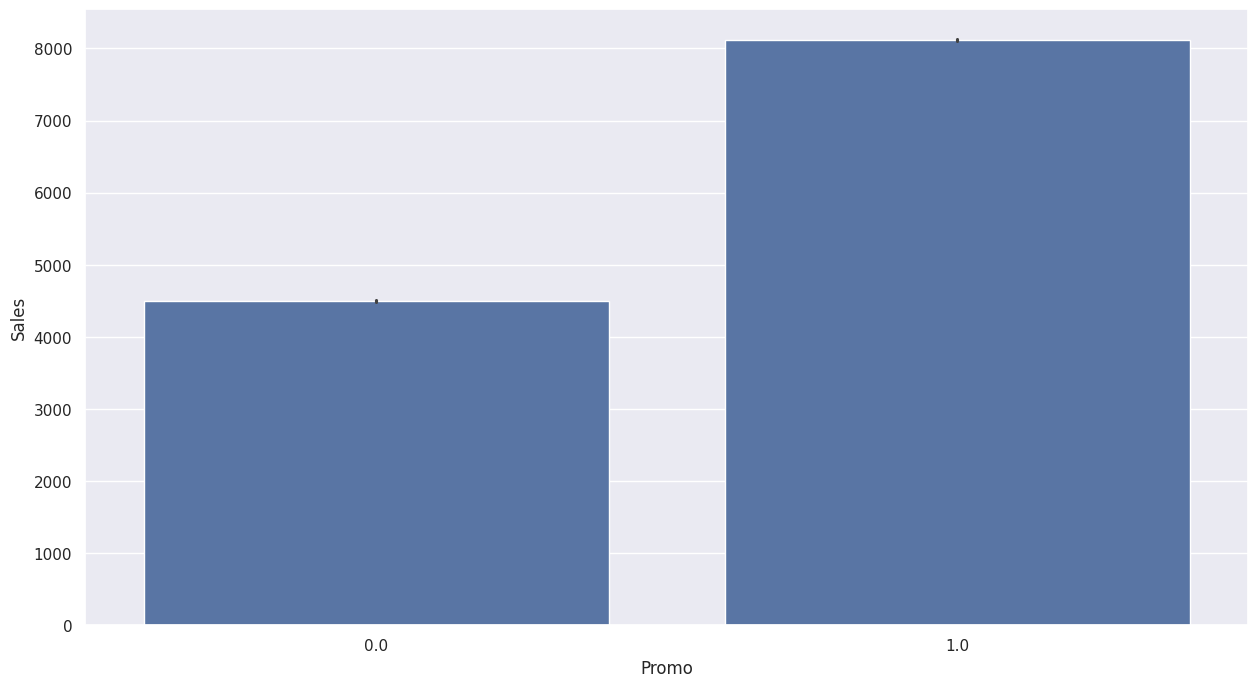

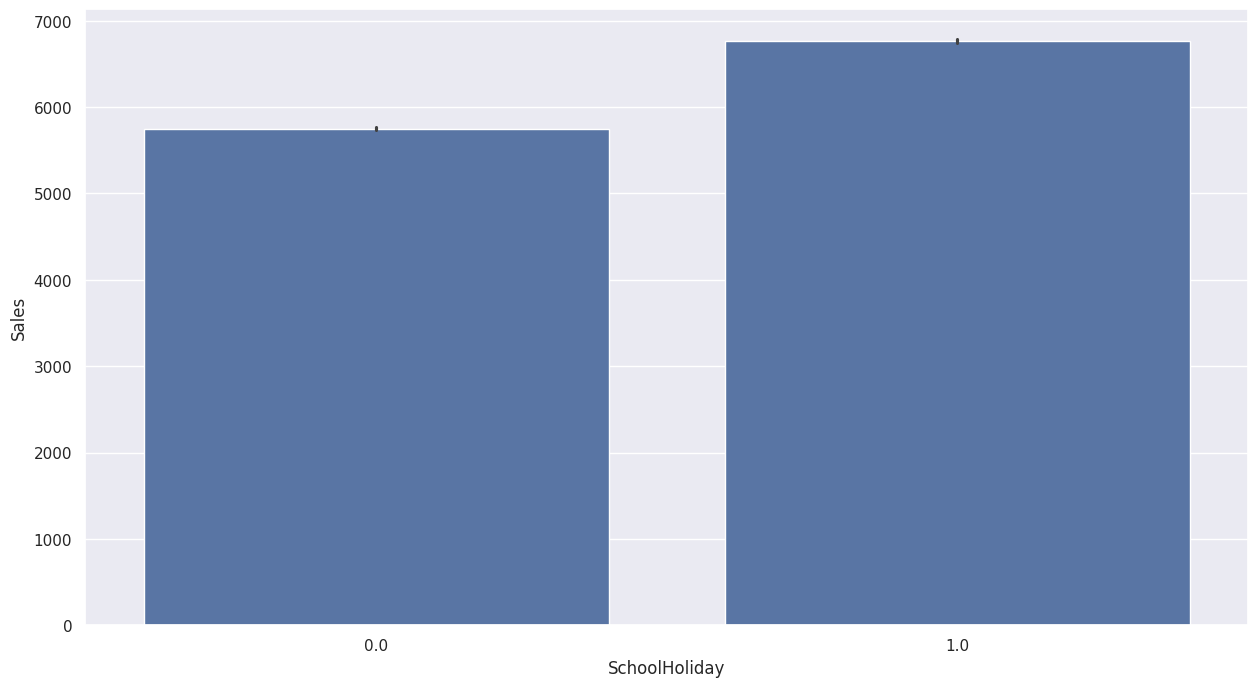

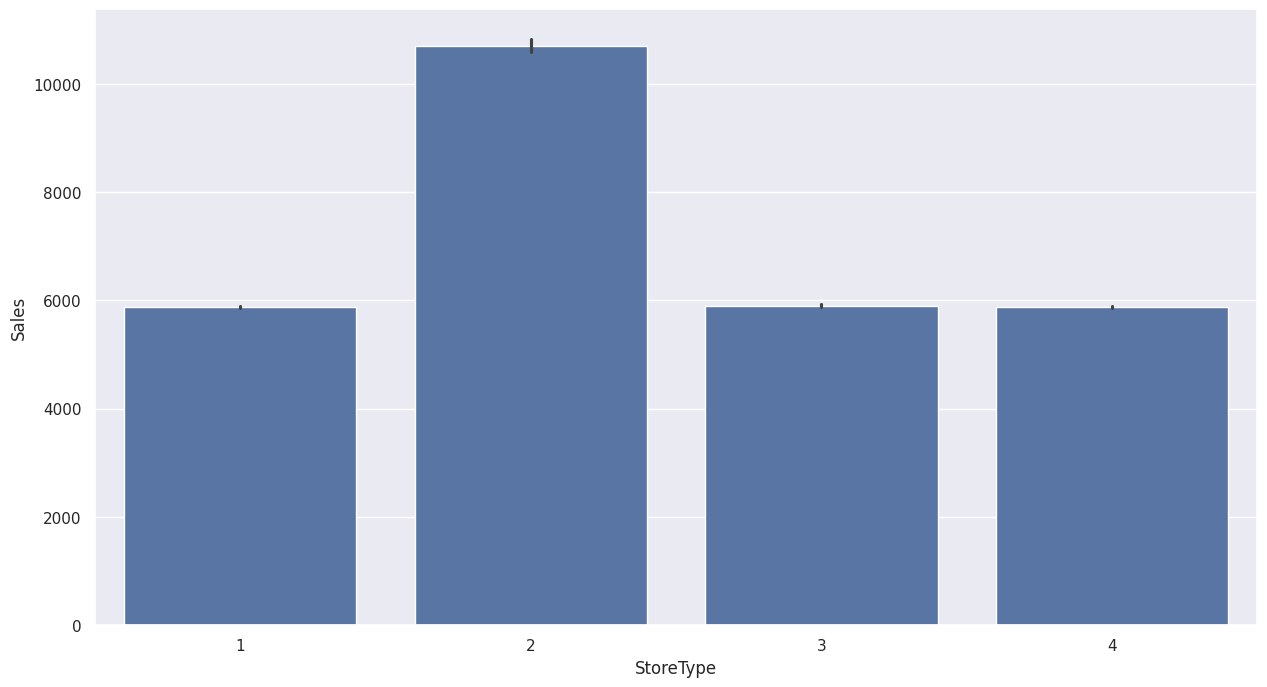

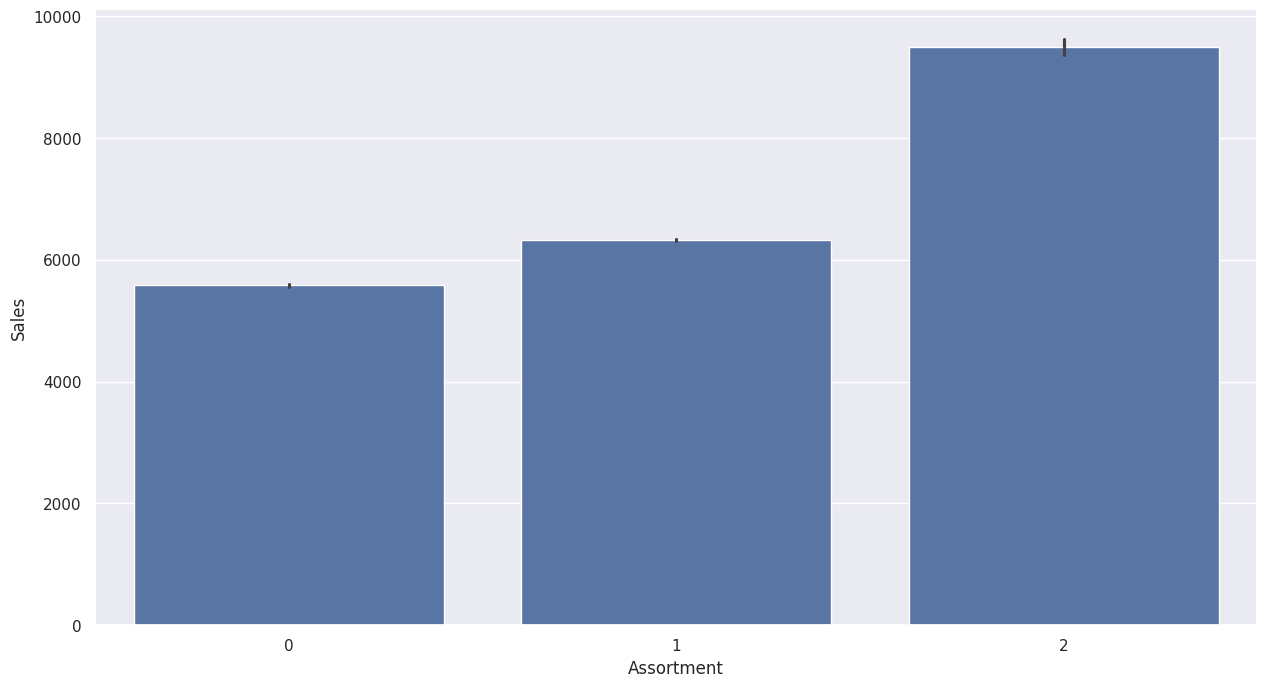

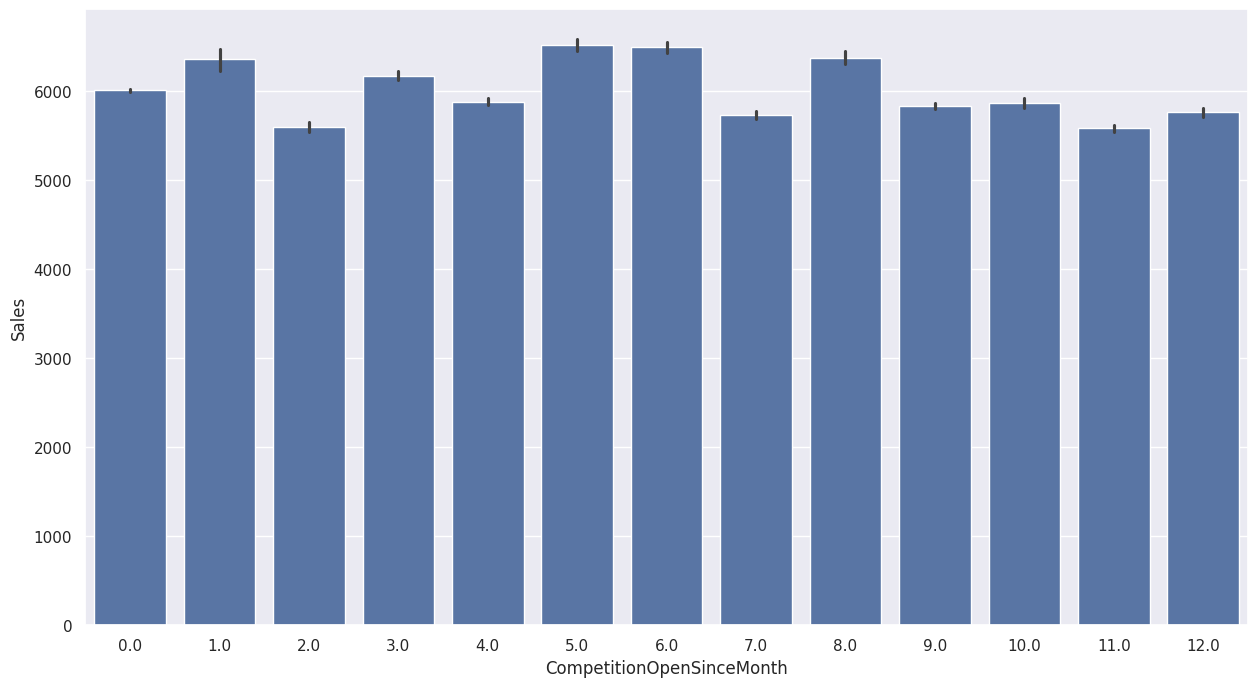

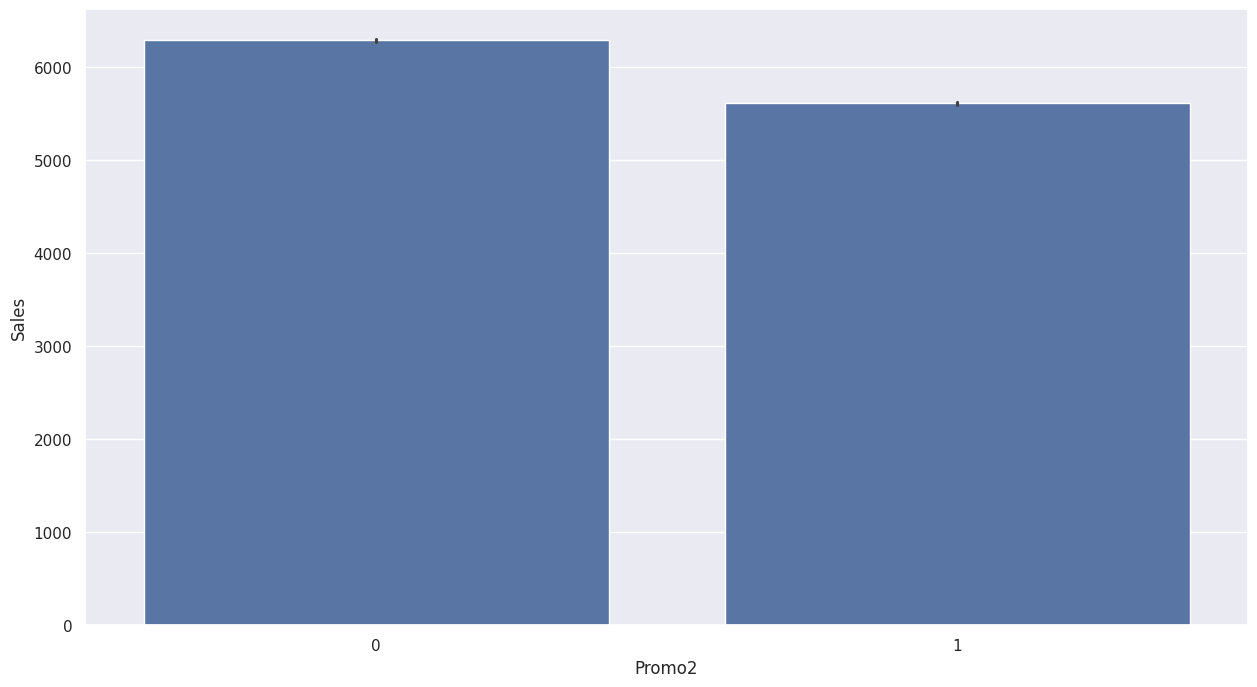

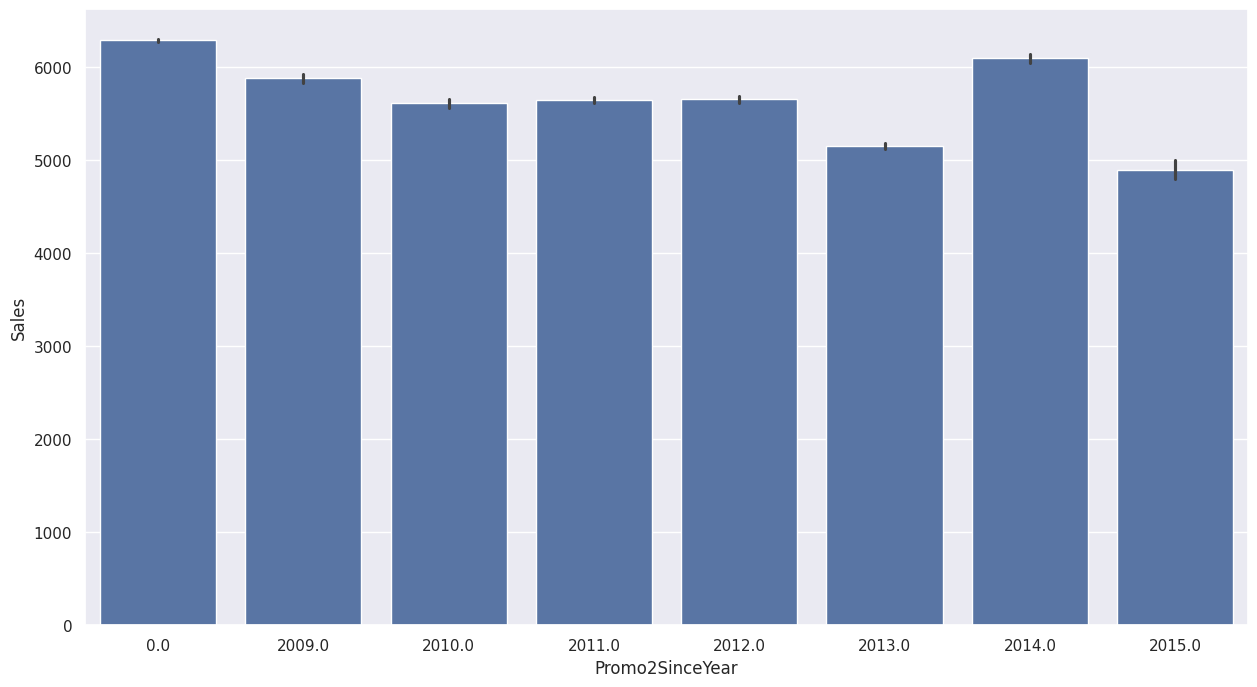

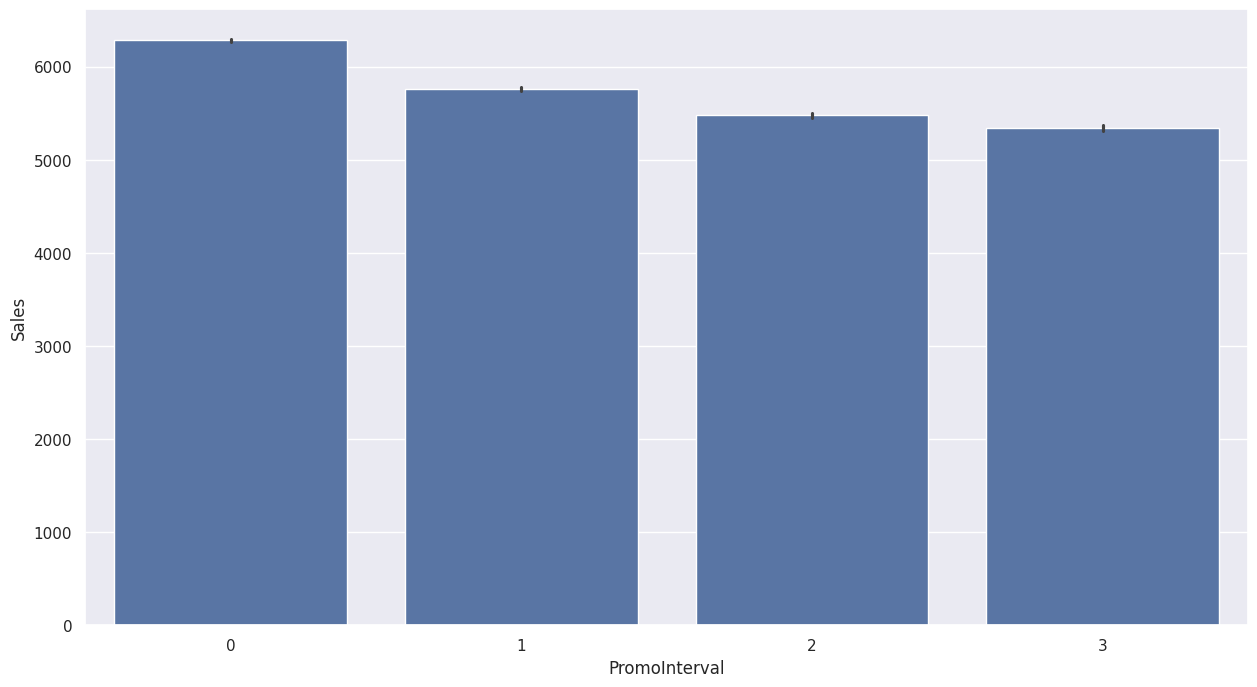

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
categorical_variables = ['DayOfWeek','Open','Promo','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  plt.show()

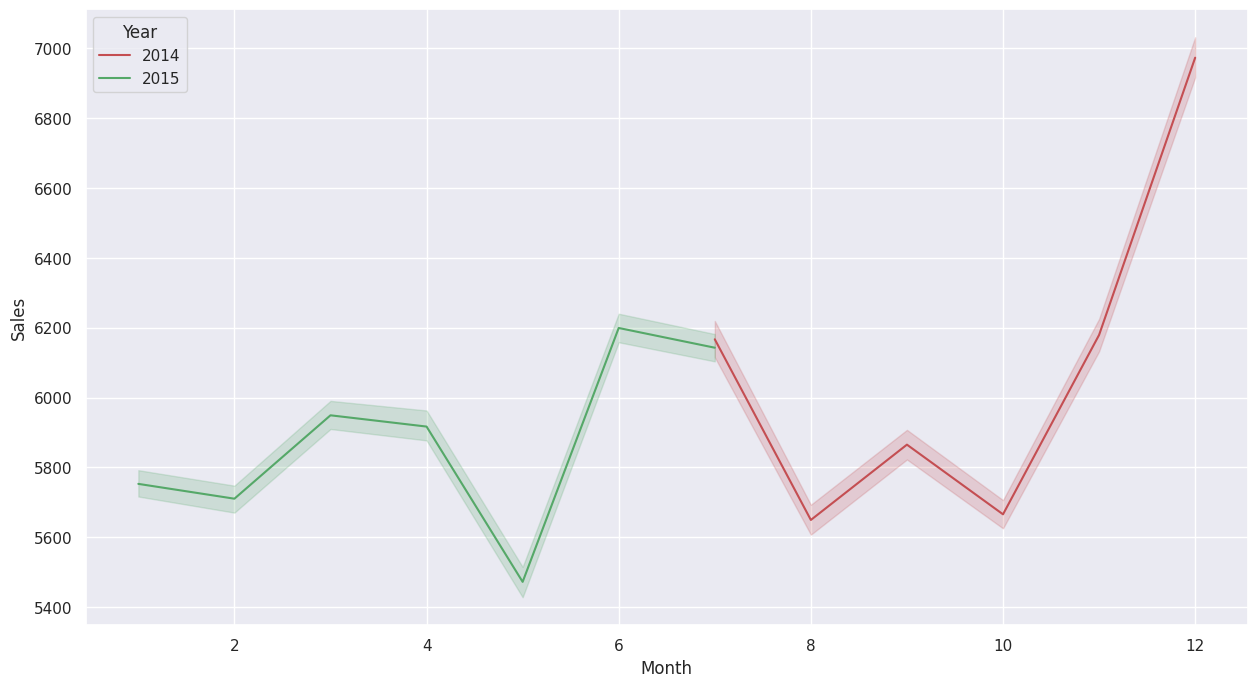

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Month', y='Sales', hue='Year',palette=['r', 'g', 'b'])
plt.show()

<Axes: xlabel='Sales', ylabel='Density'>

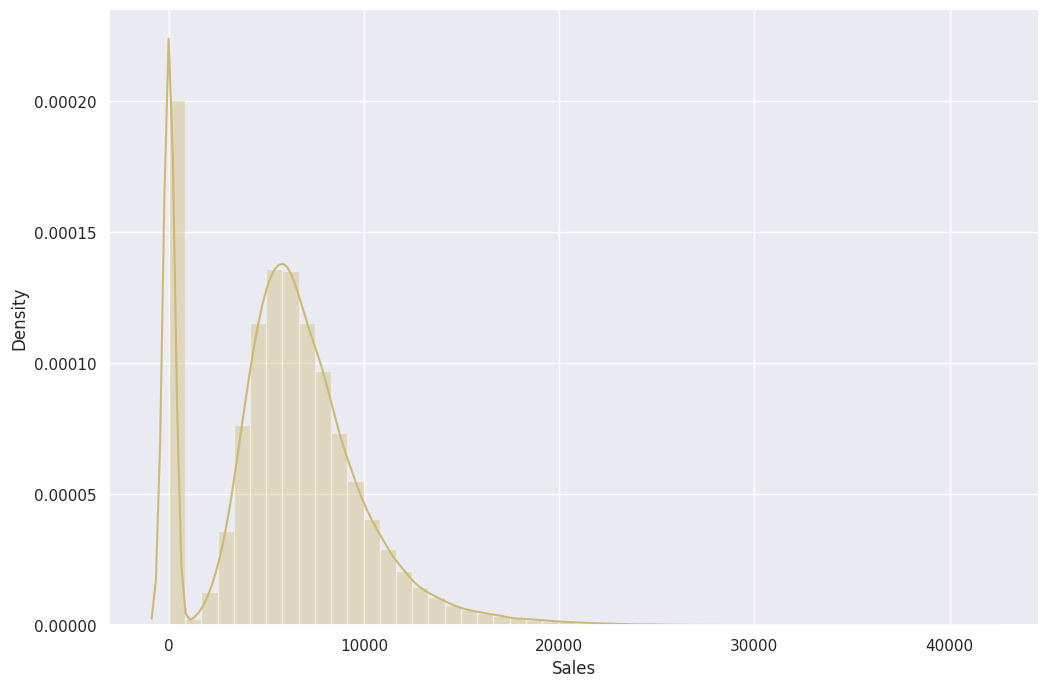

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['Sales'],color="y")

In [ ]:
dfcount = (df['Sales'] < 20000).value_counts()
dfcount

Sales
True     394121
False      1635
Name: count, dtype: int64

In [ ]:
logsales = np.log10(df['Sales'])


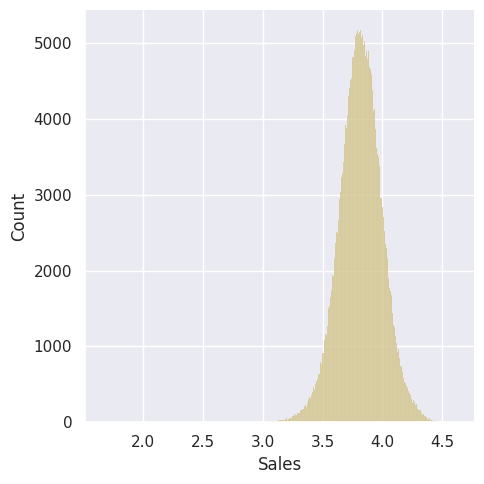

In [ ]:
sns.displot(logsales,color="y")

<Axes: ylabel='Sales'>

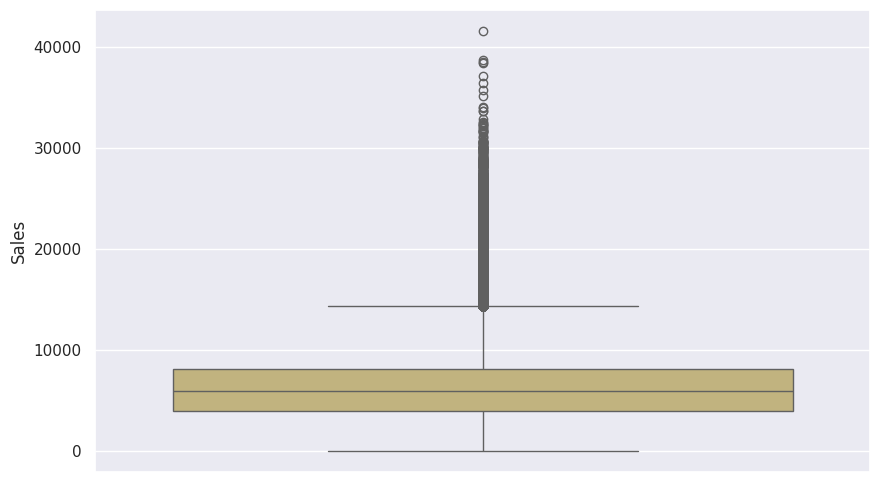

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Sales'],color="y")

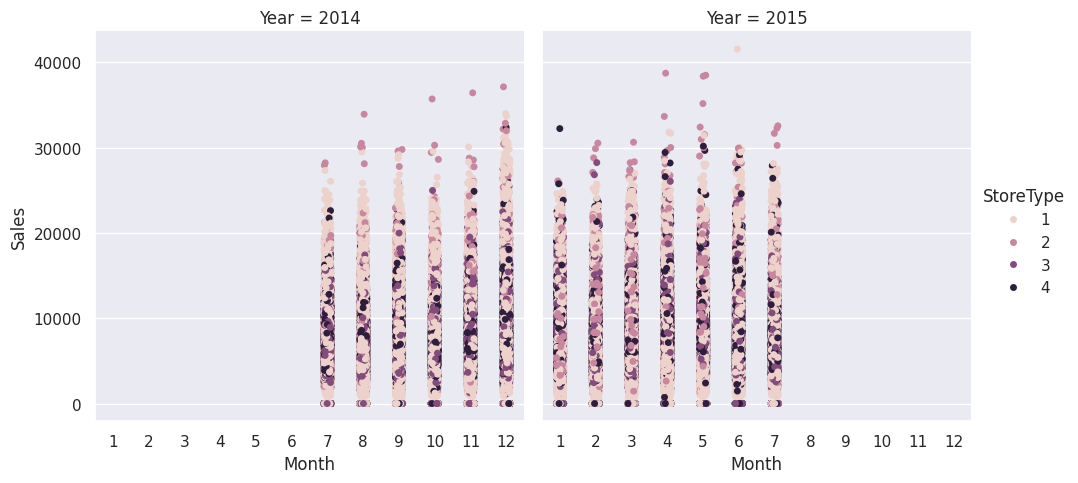

In [ ]:
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

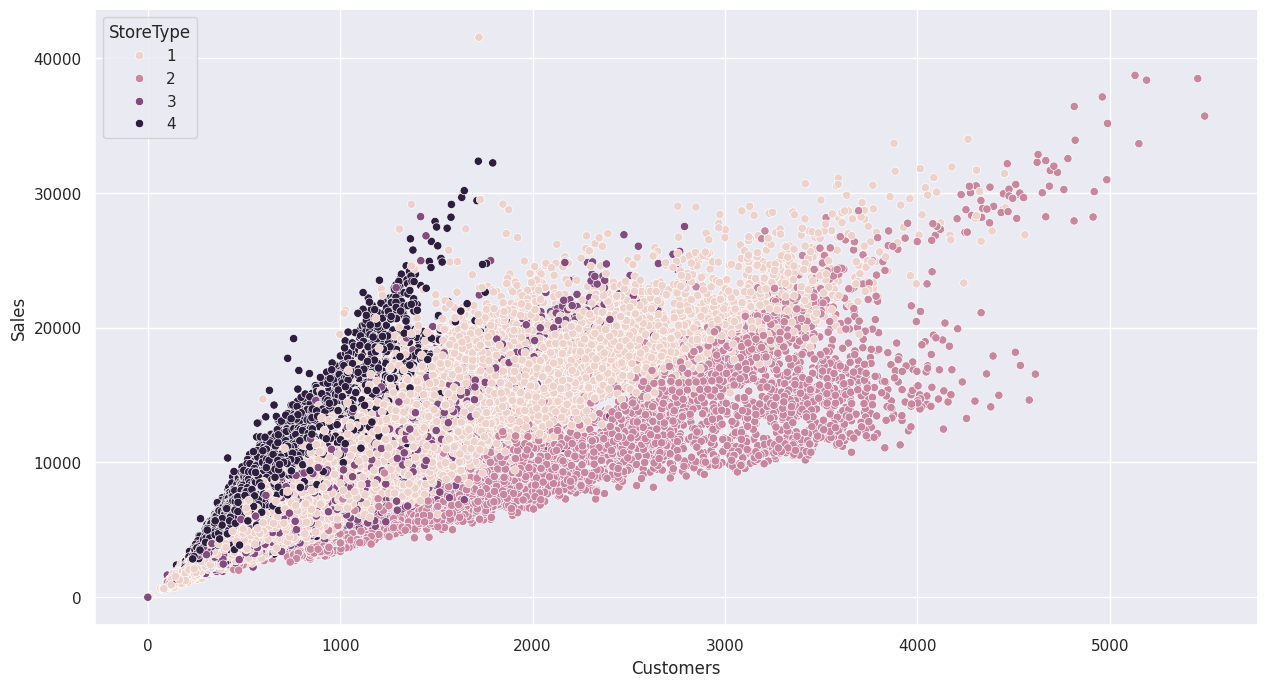

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='StoreType')
plt.show()

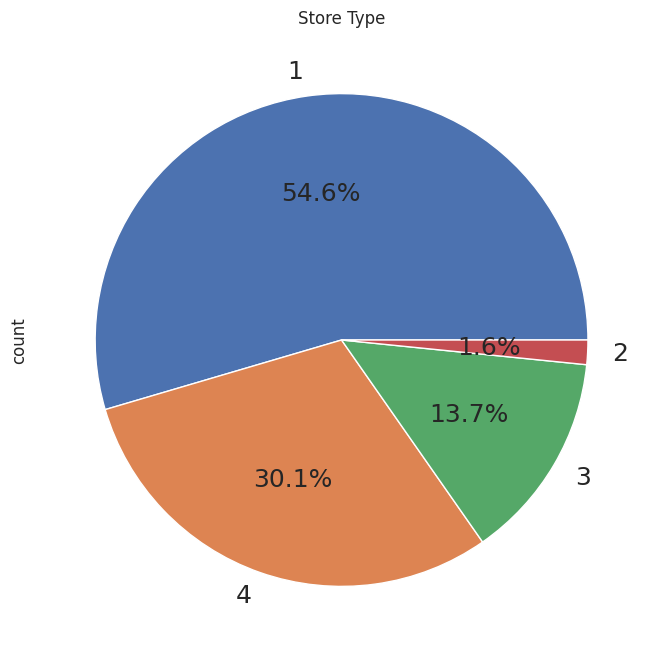

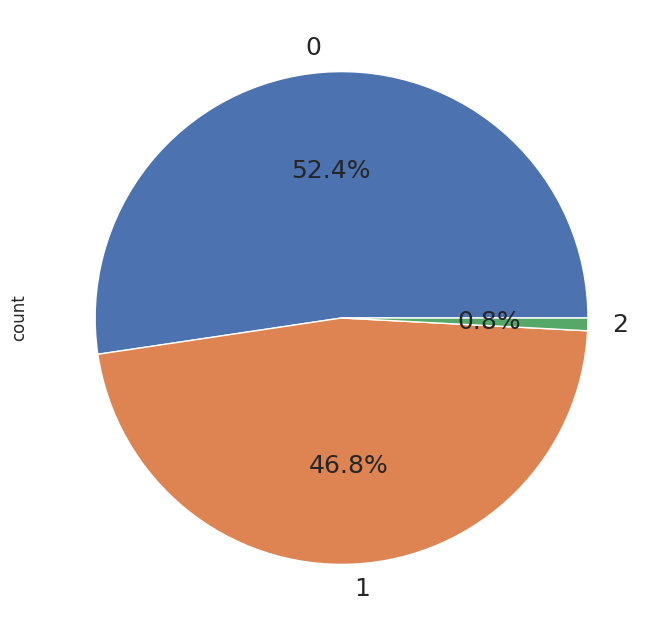

In [ ]:
percent = df["StoreType"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Store Type')
plt.show()

percent = df["Assortment"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.show()

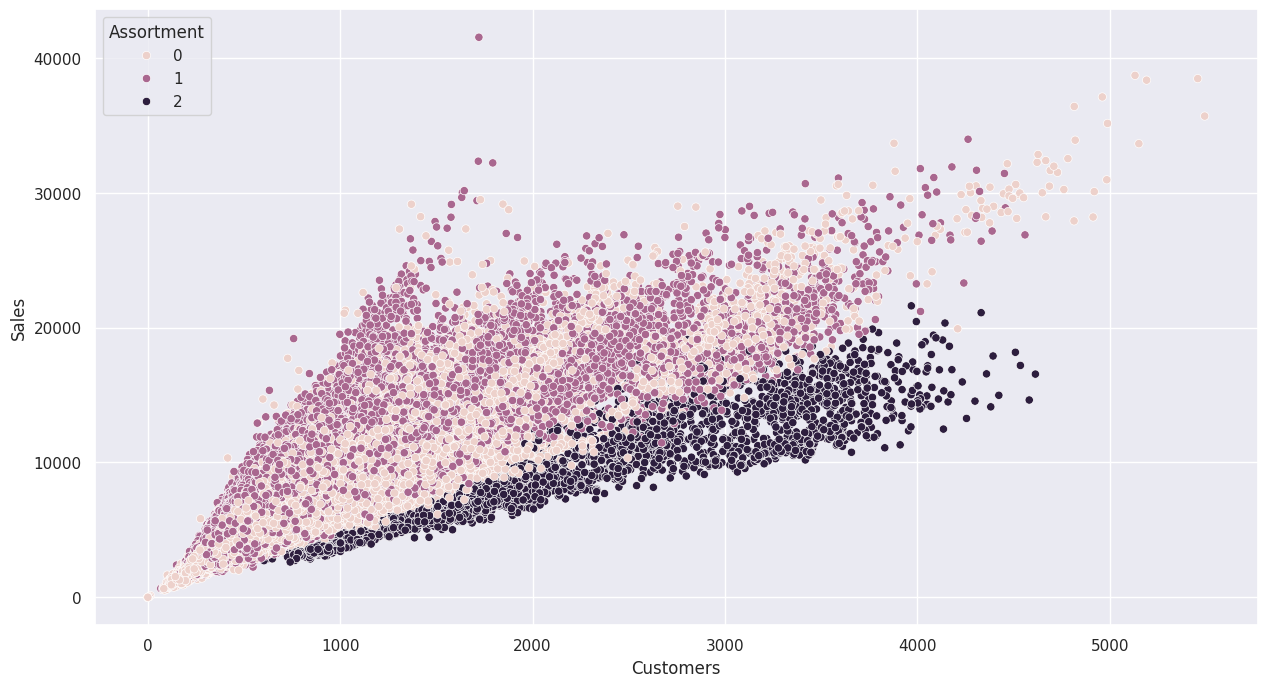

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='Assortment')
plt.show()

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

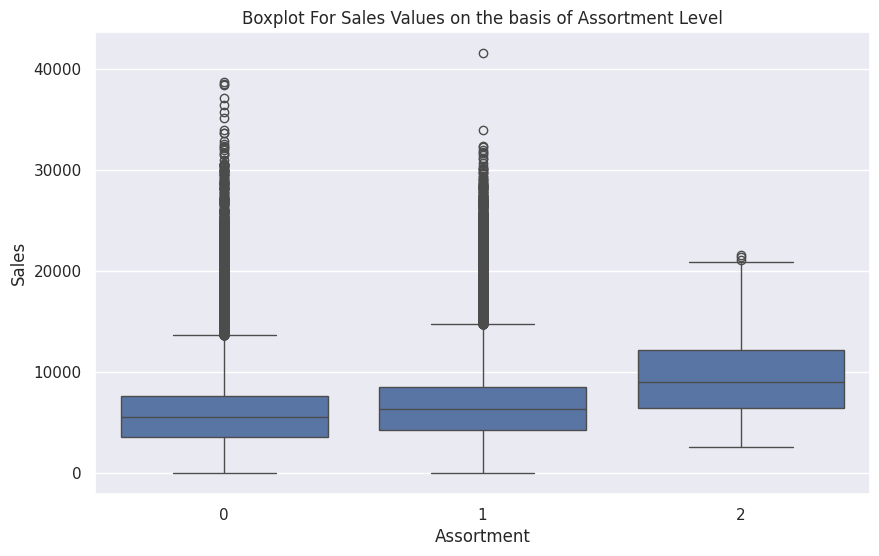

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

Text(0.5, 1.0, 'Boxplot For Sales Values')

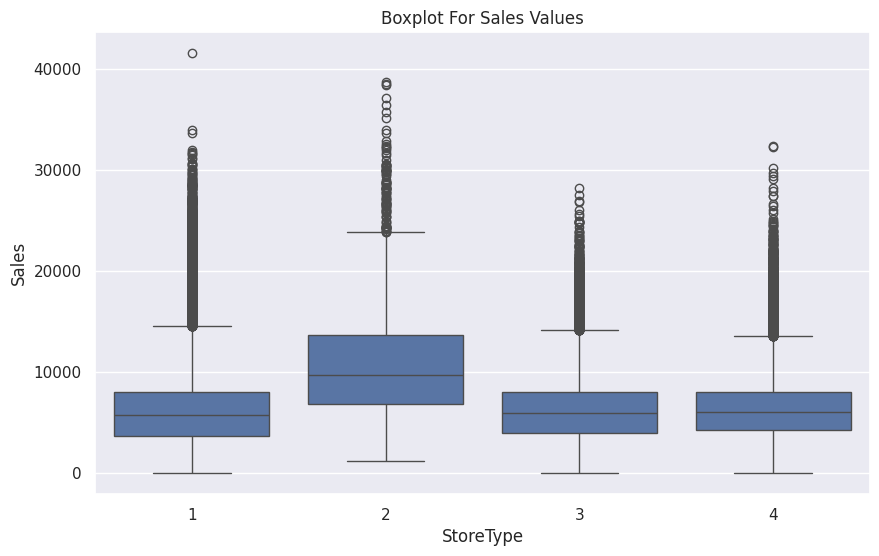

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

# Modeling

### factors affecting choosing the Algorithm
1. There are various factors such as time complexity, categorical features , numerical features , data ,outliers, noise which decide the best model to be used.
2. As there are many categorical features so the decision tree could work better in such case
3. decision Tree is highly interpretable which will helpful for feature importance
4. Here we go  with decision tree along with linear regression models to understand which will work better.

# Multicollinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Drop rows with NaN values in the relevant columns before calculating VIF
df_cleaned = df.dropna(subset=['Open', 'Promo', 'SchoolHoliday']).copy()

calc_vif(df_cleaned[[i for i in df_cleaned.describe().columns if i not in ['Sales','Open']]])

variables           VIF
0                       Store  4.031174e+00
1                   DayOfWeek  6.985517e+00
2                   Customers  3.941897e+00
3                       Promo  2.158108e+00
4               SchoolHoliday  1.340411e+00
5                   StoreType  3.945497e+00
6                  Assortment  2.114623e+00
7         CompetitionDistance  1.598857e+00
8   CompetitionOpenSinceMonth  6.124898e+00
9    CompetitionOpenSinceYear  8.384637e+00
10                     Promo2  1.678475e+06
11            Promo2SinceWeek  4.023982e+00
12            Promo2SinceYear  1.677970e+06
13              PromoInterval  5.464882e+00
14                       Year  3.331715e+01
15                      Month  4.649405e+00
16                        Day  4.475522e+00

# 1.Train-Test Split (Random Split)

In [ ]:
dfr=df.copy()

In [ ]:
#dfr.drop('Date',axis=1,inplace=True)

In [ ]:
# check
dfr.head(2)

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  StoreType  \
0      1          5   5263        555   1.0    1.0            1.0          3   
1      2          5   6064        625   1.0    1.0            1.0          1   

   Assortment  CompetitionDistance  ...  Promo2  Promo2SinceWeek  \
0           0               1270.0  ...       0              0.0   
1           0                570.0  ...       1             13.0   

   Promo2SinceYear  PromoInterval  Year  Month  Day  StateHoliday_a  \
0              0.0              0  2015      7   31           False   
1           2010.0              1  2015      7   31           False   

   StateHoliday_b  StateHoliday_c  
0           False           False  
1           False           False  

[2 rows x 22 columns]

In [ ]:
# Create the data of independent variables
dependent_variable = 'Sales'
# Create a list of independent variables

# Drop rows with NaN values in the relevant columns before creating X and y
dfr_cleaned = dfr.dropna(subset=['Open', 'Promo', 'SchoolHoliday']).copy()
X = dfr_cleaned.drop('Sales',axis=1,inplace=False)

# Create the dependent variable data
y = dfr_cleaned[dependent_variable].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LINEAR REGRESSION

In [83]:
# Createing an instance of Linear Regression implementation
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Drop rows with NaN values in the training data before fitting
X_train_cleaned = X_train[~np.isnan(X_train).any(axis=1)]
y_train_cleaned = y_train[~np.isnan(X_train).any(axis=1)]

# Fit the Lasso model
regressor.fit(X_train_cleaned, y_train_cleaned)

# Create the model score
print(regressor.score(X_test, y_test), regressor.score(X_train_cleaned, y_train_cleaned))

0.8653307127201186 0.8643924887858879


In [85]:
#Checking the score on train set.
regressor.score(X_train_cleaned, y_train_cleaned)

0.8643924887858879

In [86]:
#checking the coefficeint
regressor.coef_

array([-1.71462873e+02, -4.99389944e+02,  3.45219100e+04,  1.40075148e+03,
        1.28816129e+03,  6.17599907e+01,  7.63814496e+02,  1.99495472e+02,
        2.09692286e+03, -7.34745394e+01,  1.22230472e+02,  7.42237229e+04,
        3.70547147e+02, -7.41465963e+04, -2.90720425e+02,  5.52893013e+02,
        8.90919140e+02,  9.76721784e+01, -8.95984824e+02, -1.09693075e+03,
       -4.31119553e+02])

In [87]:
#check the intercept
regressor.intercept_

np.float64(-879.5043140922271)

In [90]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train_cleaned)
y_pred_test = regressor.predict(X_test)

In [91]:
import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred_test))

np.float64(1432.5131320779524)

In [93]:
# Checking the Performance on train set
r2_train= r2_score(y_train_cleaned, y_pred_train)
print(r2_train)

0.8643924887858879


In [94]:
# Checking the Performance on test set
r2_test= r2_score(y_test, y_pred_test)
print(r2_test)

0.8653307127201186


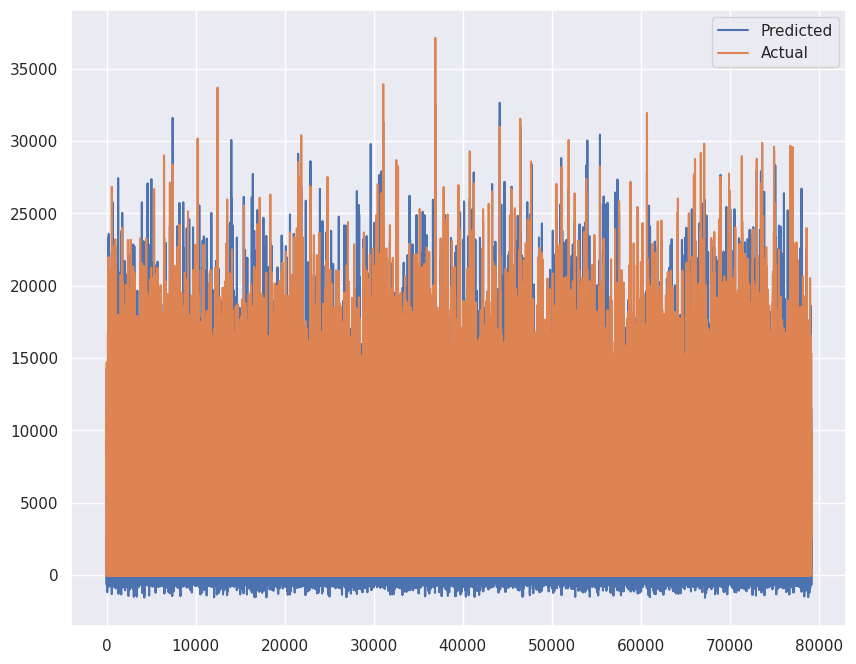

In [95]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

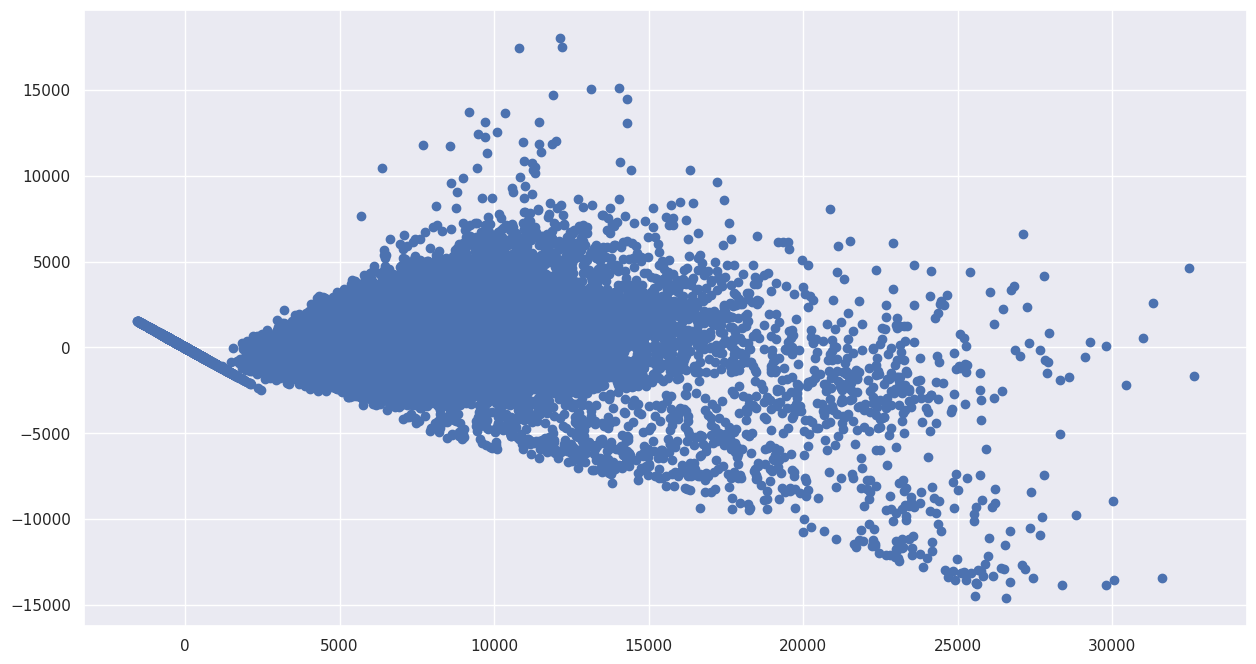

In [96]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.show()

# LASSO REGRESSION

In [81]:
# Createing an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)

# Drop rows with NaN values in the training data before fitting
X_train_cleaned = X_train[~np.isnan(X_train).any(axis=1)]
y_train_cleaned = y_train[~np.isnan(X_train).any(axis=1)]

# Fit the Lasso model
lasso.fit(X_train_cleaned, y_train_cleaned)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train_cleaned, y_train_cleaned))

0.8652241741599193 0.8642894637730383


In [100]:
# Predicting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train_cleaned)
y_pred_test_lasso=lasso.predict(X_test)

In [101]:
# Checking the Performance on train set
r2_train_lasso= r2_score(y_train_cleaned, y_pred_train_lasso)
print(r2_train_lasso)

0.8642894637730383


In [102]:
# Checking the Performance on test set
r2_test_lasso= r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

0.8652241741599193


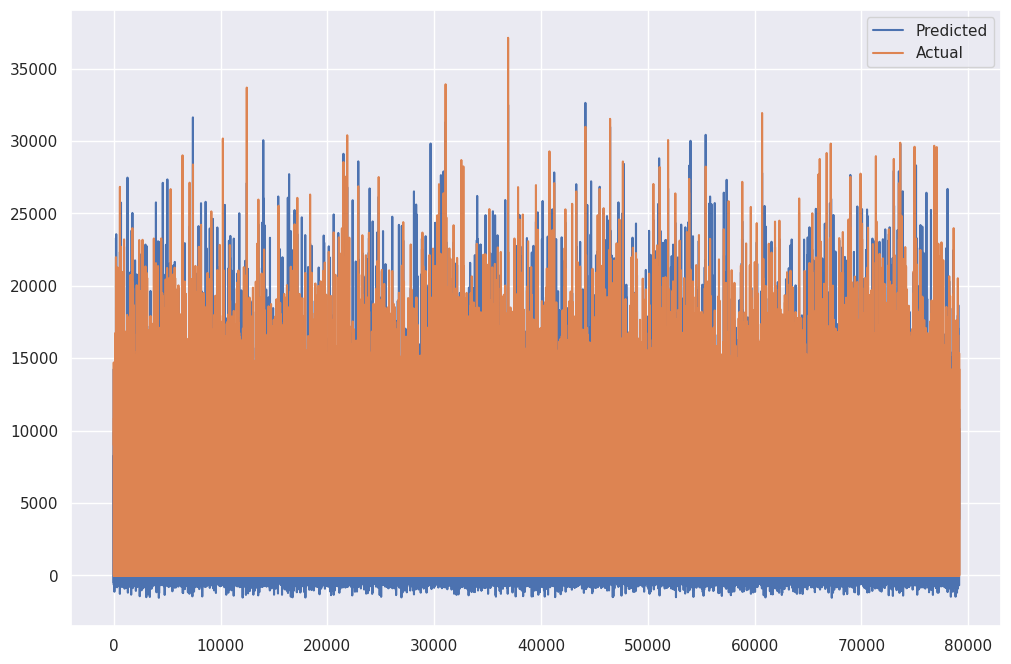

In [103]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# RIDGE REGRESSION

In [105]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.01)

# Drop rows with NaN values in the training data before fitting
X_train_cleaned = X_train[~np.isnan(X_train).any(axis=1)]
y_train_cleaned = y_train[~np.isnan(X_train).any(axis=1)]

# Fitting the model
ridge.fit(X_train_cleaned,y_train_cleaned)

# check the score
ridge.score(X_train_cleaned, y_train_cleaned)

0.8643891087937153

In [106]:
#Predict the X_train and X-test values
y_pred_train_ridge=ridge.predict(X_train_cleaned)
y_pred_test_ridge=ridge.predict(X_test)

In [107]:
# Checking the Performance on train set
r2_train_ridge = r2_score(y_train_cleaned, y_pred_train_ridge)
print(r2_train_ridge)

0.8643891087937153


In [108]:
# Checking the Performance on test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

0.8653266220044412


# Decision Tree

In [109]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [110]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = dfr.columns.drop(['Year','Month','Day','Open','Sales'])

# Create the data of independent variables
X = dfr[indep_var]

# Create the dependent variable data
y = dfr[dep_var]

In [111]:
# the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [112]:
from sklearn.preprocessing import StandardScaler
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# DecisionTreeRefressor
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, y_train)

In [114]:
#predict the X_train and X-test values
y_pred_train_d = Decision_tree.predict(X_train)
y_pred_test_d = Decision_tree.predict(X_test)

In [115]:
# Checking the Performance on train set
r2_train_decision = r2_score(y_train, y_pred_train_d)
print(r2_train_decision)

0.9997215262584654


In [116]:
# Checking the Performance on test set
r2_test_decision= r2_score(y_test, y_pred_test_d)
print(r2_test_decision)

0.9714241118467387


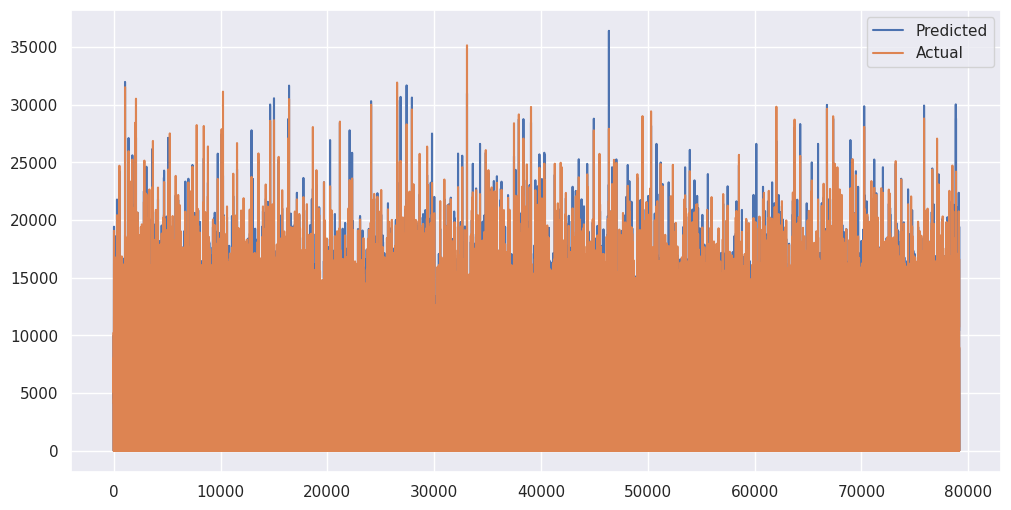

In [117]:
#Plot
plt.figure(figsize=(12,6))
plt.plot(np.array(y_pred_test_d))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Decision Tree With Hyper Parameter Tuning

In [118]:
Decision_tree1= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
Decision_tree_reg1 = Decision_tree1.fit(X_train, y_train)

In [119]:
train_score = Decision_tree_reg1.score(X_train, y_train)
Test_Score = Decision_tree_reg1.score(X_test, y_test)
print(train_score)
print(Test_Score)

0.9845822757900086
0.9749691280165219


# Random Forest

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [121]:
#I trained Model with hyper parameters..to not run everytime i record the result
#Here are our best parameters for Random Forest
"""
{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }
"""

'\n{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }\n'

In [122]:
# Create and train the RandomForestRegressor model with the identified parameters
rf_model = RandomForestRegressor(n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80, random_state=1)

In [124]:
#Random Forest with Parameters
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [125]:
# Making predictions on train and test data
y_pred_train_r = rdf.predict(X_train)
y_pred_test_r = rdf.predict(X_test)

In [126]:
# Checking the Performance on train set
r2_train_random = r2_score(y_train, y_pred_train_r)
print(r2_train_random)

0.9973845390083775


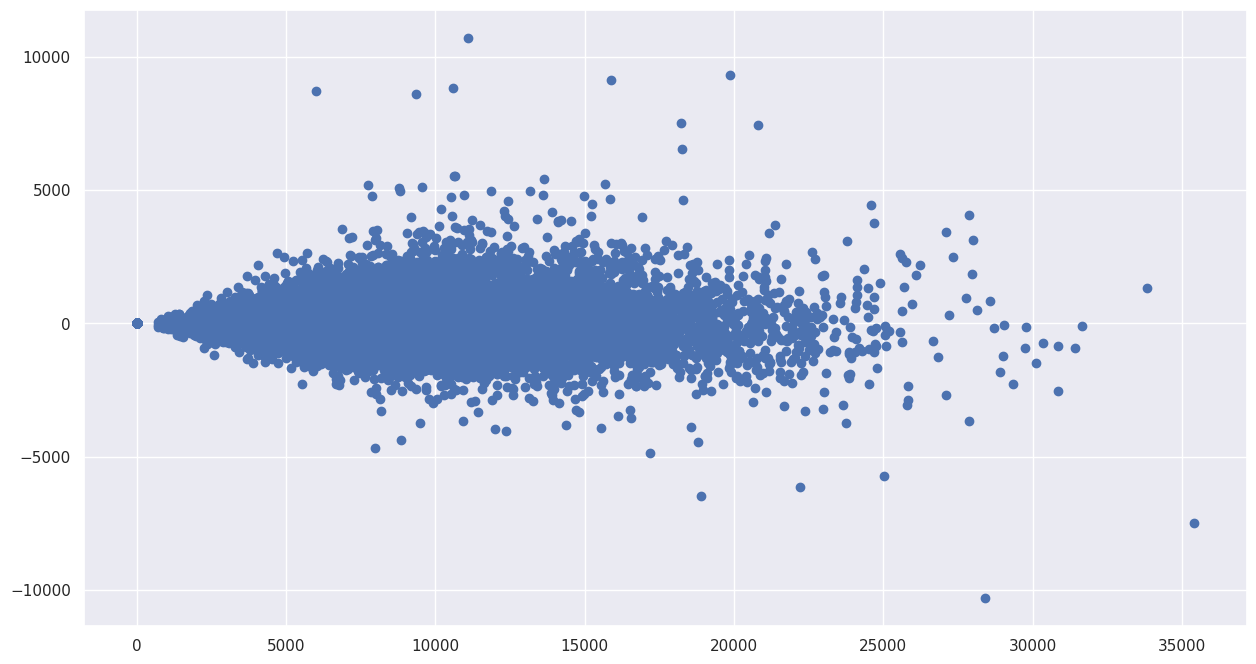

In [127]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.show()

In [128]:
dfr.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [130]:
# Checking the Performance on test set
r2_test_random = r2_score(y_test, y_pred_test_r)

Score_dfr = pd.DataFrame({'Regressions':['LinearRegression','LassoRegression','RidgeRegresion', 'DecisionTreeRegressor', 'RandomForestRegressor'],'Train_Score':[r2_train, r2_train_lasso, r2_train_ridge,r2_train_decision, r2_train_random],'Test_Score':[r2_test,r2_test_lasso,r2_test_ridge, r2_test_decision, r2_test_random]})

In [131]:
Score_dfr

Regressions  Train_Score  Test_Score
0       LinearRegression     0.864392    0.865331
1        LassoRegression     0.864289    0.865224
2         RidgeRegresion     0.864389    0.865327
3  DecisionTreeRegressor     0.999722    0.971424
4  RandomForestRegressor     0.997385    0.983042

# 2.Train-Test Split (Time Base Split)

## Why we select  Time Base Split over random Split?
1. As we have to predict data of last 6 weeks means we have train on data before the 6 weeks
2. In such case random split will leads to data leakage
3. So we go with time base split for our best model.

In [133]:
# Recreate the 'Date' column from the Year, Month, and Day columns
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# date as index
df.set_index(['Date'],inplace=True)
# sorting
df.sort_index(inplace=True)
# chekc
df.head(2)

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
Date                                                                         
2014-07-14    507          1  11047        710   NaN    NaN            NaN   
2014-07-14    167          1  13642       1393   1.0    1.0            0.0   

            StoreType  Assortment  CompetitionDistance  ...  Promo2  \
Date                                                    ...           
2014-07-14          1           1               9070.0  ...       1   
2014-07-14          1           0                140.0  ...       0   

            Promo2SinceWeek  Promo2SinceYear  PromoInterval  Year  Month  Day  \
Date                                                                            
2014-07-14             37.0           2009.0              1  2014      7   14   
2014-07-14              0.0              0.0              0  2014      7   14   

            StateHoliday_a  StateHoliday_b  StateHoliday_c  
Date                                                        
2014-07-14           False           False           False  
2014-07-14           False           False           False  

[2 rows x 22 columns]

In [134]:
train_data=df.loc[:pd.to_datetime("2015-06-14")]
test_data=df.loc[pd.to_datetime("2015-06-15"):]

In [135]:
# Create the data of independent variables
X_train=train_data[list(set(df.columns)-{"Sales","Date"})]
# Create a list of independent variables
y_train=train_data["Sales"]

In [136]:
X_test=test_data[list(set(df.columns)-{"Sales","Date"})]
y_test=test_data["Sales"]

In [151]:
# Transforming data
scaler = MinMaxScaler()
X_train_cleaned = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# LINEAR REGRESSION

In [154]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()

# Drop rows with NaN values in the training data before fitting
X_train_cleaned = X_train[~np.isnan(X_train).any(axis=1)]
y_train_cleaned = y_train[~np.isnan(X_train).any(axis=1)]

regressor.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [155]:
#Checking the score on train set.
regressor.score(X_train_cleaned, y_train_cleaned)

0.8645878036701571

In [156]:
#checking the coefficeint
regressor.coef_

array([-2.94165016e+02, -7.44308329e+04,  3.45255851e+04,  7.45129734e+04,
        9.45811203e+01,  3.61276515e+02,  2.09644861e+03, -1.65407239e+02,
       -8.99612678e+02, -4.95725754e+02, -7.05587266e+01, -1.08697284e+03,
       -4.30971547e+02,  1.98986273e+02,  1.19114681e+02,  8.78703661e+02,
        6.32480506e+01,  5.48211313e+02,  1.40277600e+03,  1.28545769e+03,
        7.63247202e+02])

In [157]:
#check the intercept
regressor.intercept_

np.float64(-874.0314219036572)

In [159]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train_cleaned)
y_pred_test = regressor.predict(X_test)

In [161]:
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred_test))

np.float64(2030.224025284434)

In [162]:
# Checking the Performance on train set
r2_train= r2_score(y_train_cleaned, y_pred_train)
print(r2_train)

0.8645878036701571


In [163]:
# Checking the Performance on test set
r2_test= r2_score(y_test, y_pred_test)
print(r2_test)

0.6766342444012469


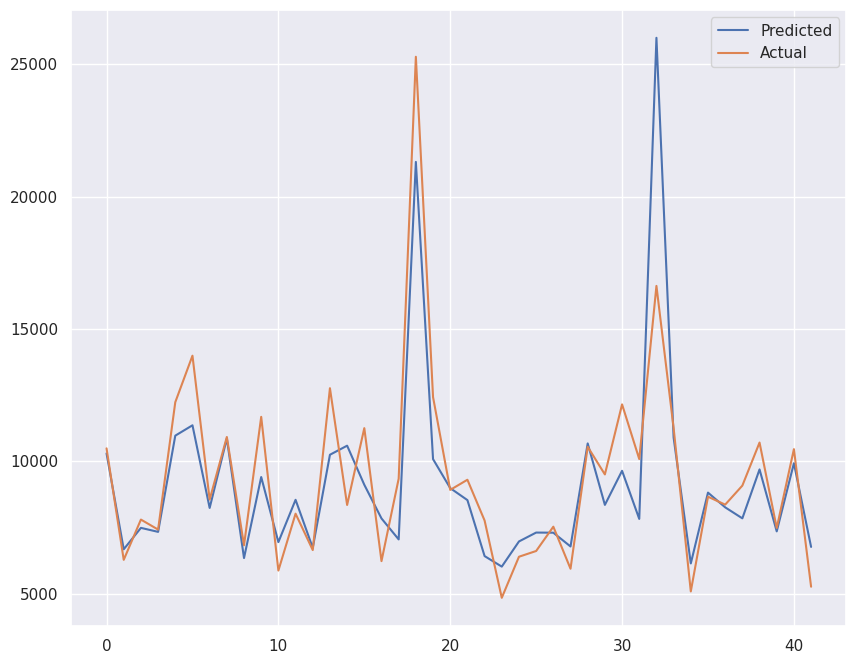

In [164]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

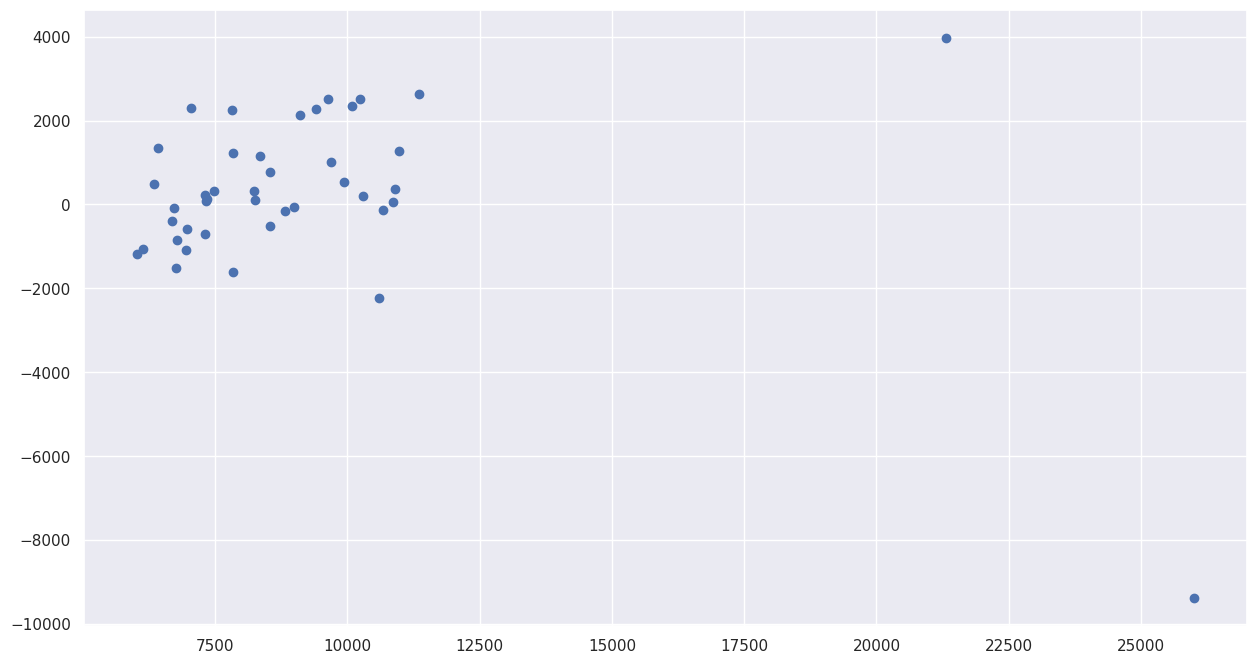

In [165]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.show()

# LASSO REGRESSION

In [166]:
# Createing an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train_cleaned, y_train_cleaned)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train_cleaned, y_train_cleaned))

0.6761110451757337 0.8644854301990467


In [167]:
# Predicting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train_cleaned)
y_pred_test_lasso=lasso.predict(X_test)

In [168]:
# Checking the Performance on train set
r2_train_lasso= r2_score(y_train_cleaned, y_pred_train_lasso)
print(r2_train_lasso)


0.8644854301990467


In [169]:
# Checking the Performance on test set
r2_test_lasso= r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

0.6761110451757337


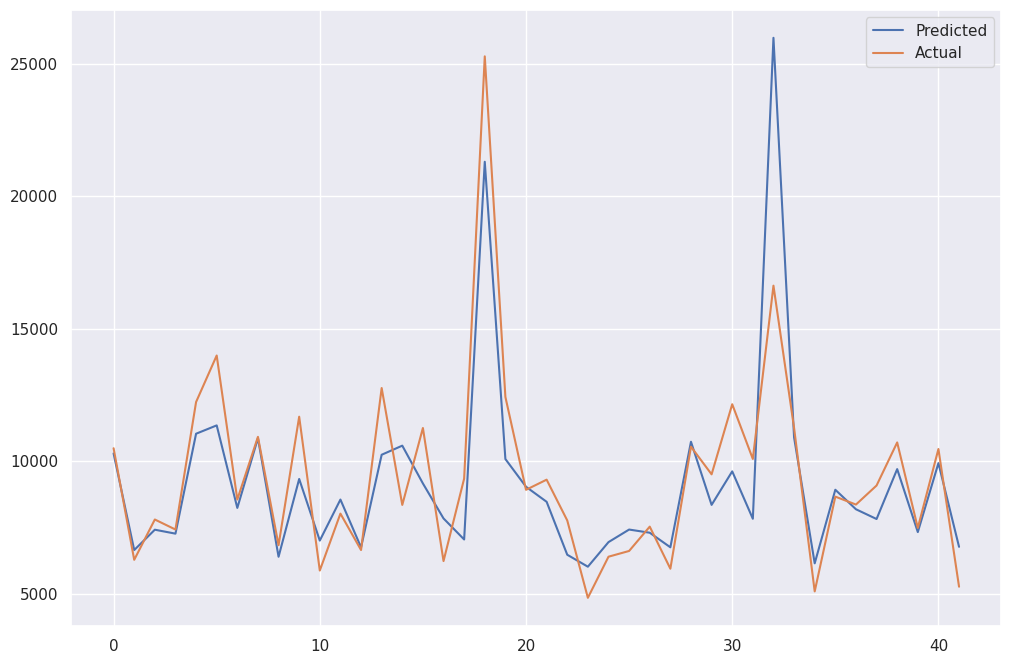

In [170]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# RIDGE REGRESSION

In [171]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.01)
# Fitting the model
ridge.fit(X_train_cleaned,y_train_cleaned)
# check the score
ridge.score(X_train_cleaned,y_train_cleaned)

0.8645854595809386

In [173]:
#Predict the X_train and X-test values
y_pred_train_ridge=ridge.predict(X_train_cleaned)
y_pred_test_ridge=ridge.predict(X_test)

In [174]:
# Checking the Performance on train set
r2_train_ridge = r2_score(y_train_cleaned, y_pred_train_ridge)
print(r2_train_ridge)

0.8645854595809386


In [175]:
# Checking the Performance on test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

0.6765751090887524


## Decision Tree

In [176]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [177]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = df.columns.drop(['Year','Month','Day','Open','Sales'])

# Create the data of independent variables
X = df[indep_var]

# Create the dependent variable data
y = df[dep_var]

In [178]:
# the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [179]:
from sklearn.preprocessing import StandardScaler
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
# DecisionTreeRefressor
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, y_train)

In [181]:
#predict the X_train and X-test values
y_pred_train_d = Decision_tree.predict(X_train)
y_pred_test_d = Decision_tree.predict(X_test)

In [182]:
# Checking the Performance on train set
r2_train_decision = r2_score(y_train, y_pred_train_d)
print(r2_train_decision)

0.9997263537232253


In [183]:
# Checking the Performance on test set
r2_test_decision= r2_score(y_test, y_pred_test_d)
print(r2_test_decision)

0.9696009232175611


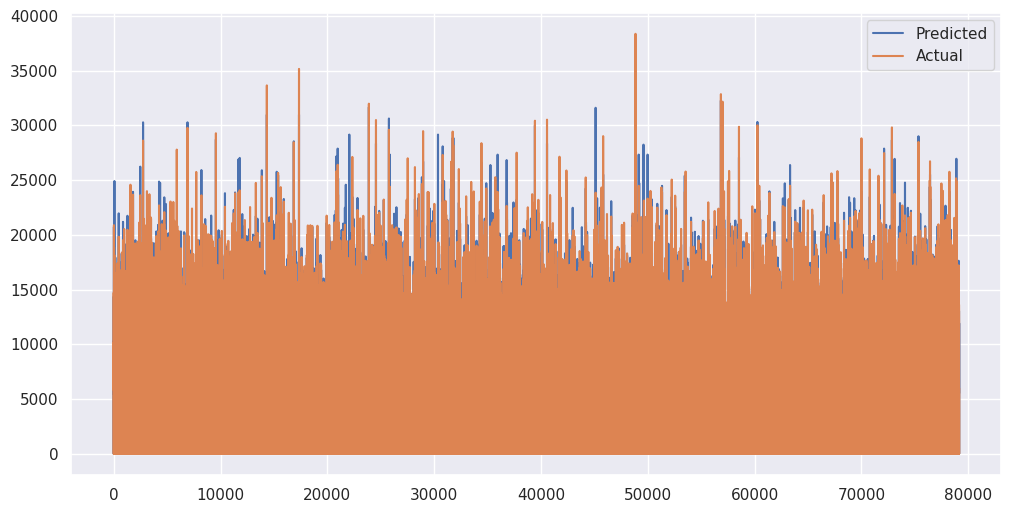

In [184]:
#Plot
plt.figure(figsize=(12,6))
plt.plot(np.array(y_pred_test_d))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Decision Tree With Hyper Parameter Tuning

In [185]:
Decision_tree1= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
Decision_tree_reg1 = Decision_tree1.fit(X_train, y_train)

In [186]:
train_score = Decision_tree_reg1.score(X_train, y_train)
Test_Score = Decision_tree_reg1.score(X_test, y_test)
print(train_score)
print(Test_Score)

0.9842965252391204
0.9735222745263714


# Random Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [188]:
#Random Forest with Parameters
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [189]:
# Making predictions on train and test data
y_pred_train_r = rdf.predict(X_train)
y_pred_test_r = rdf.predict(X_test)

In [190]:
# Checking the Performance on train set
r2_train_random = r2_score(y_train, y_pred_train_r)
print(r2_train_random)

0.9973884418277327


In [191]:
# Checking the Performance on test set
r2_test_random= r2_score(y_test, y_pred_test_r)
print(r2_test_random)

0.9828303504674081


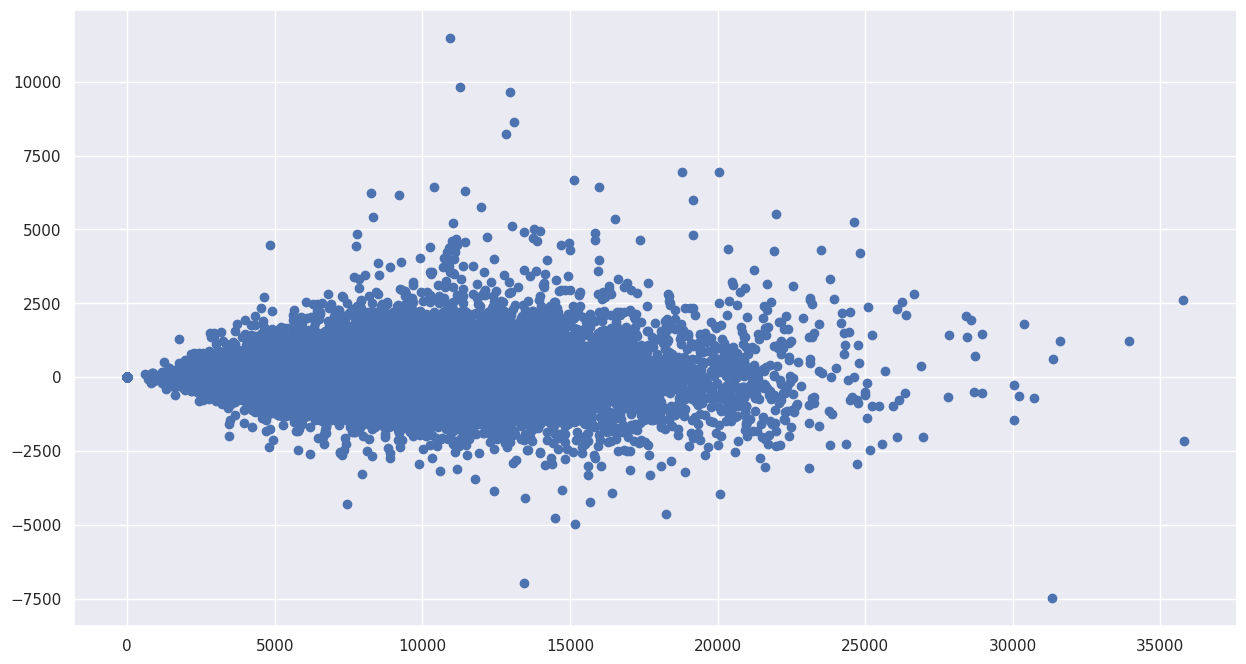

In [192]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.show()

In [193]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [194]:
Score_df = pd.DataFrame({'Regressions':['LinearRegression','LassoRegression','RidgeRegresion', 'DecisionTreeRegressor', 'RandomForestRegressor'],'Train_Score':[r2_train, r2_train_lasso, r2_train_ridge,r2_train_decision, r2_train_random],'Test_Score':[r2_test,r2_test_lasso,r2_test_ridge, r2_test_decision, r2_test_random]})

In [195]:
Score_df

Regressions  Train_Score  Test_Score
0       LinearRegression     0.864588    0.676634
1        LassoRegression     0.864485    0.676111
2         RidgeRegresion     0.864585    0.676575
3  DecisionTreeRegressor     0.999726    0.969601
4  RandomForestRegressor     0.997388    0.982830

# Observation

1. From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.
2. From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Plot between Promotion and Sales shows that promotion helps in increasing Sales.
4. Type of Store plays an important role in opening pattern of stores.
5. All Type ‘b’ stores never closed except for refurbishment or other reason.
6. All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.
7. ssortment Level ‘b’ is only offered at Store Type ‘b’.
8. We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

# Conclusion

### 1. Rossmann Stores Data.csv dataset has 10,107,219 rows and 10 columns. store.csv dataset has 1115 rows and 9 columns.
### 2. The sales in the month of December is the highest sales among others.
### 3. The Promotion increases the sales so we should focus on that factor
### 4. As the customers are positively correlated with sales so we have to increase the frequecy of customers by offers
### 5. The sales for store type B is higher than any other stores

## CONCLUSION
In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Sales' and also transformed it. Next we analysed categorical variable and replaced null values, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable using corr() Function. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.We split the data into train which exclude last 6 weeks data and test which contain last 6 weeks data.

Next we implemented six machine learning algorithms Linear Regression, lasso,ridge, decission tree, Random Forest. We did hyperparameter tuning into improve our model performance.

1. The sales in the month of December is the highest sales among others.
2. The Sales is highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Those Stores who takes participate in Promotion got their Sales increased.
4. Type of Store plays an important role in opening pattern of stores. All Type ‘b’ stores never closed except for refurbishment or other reason.
5. We can observe that most of the stores remain closed during State holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
6. The R Squared score of all Liner Regression Algorithm with or without Regularization are quit good which is 0.86.
7. the R Squared score of the Decision Tree Regressor model we got 0.97 on test set which is also good.
8. The Random Forest regressor model performed 0.98 which is very well amoung the others.
10. We can say that random forest regressor model is our optimal model and can be deploy.